# **Data Mining Project** 
# Task 2: Density Based Clustering Analysis by DBSCAN 
Pistolesi Veronica, Poli Francesca

## Libraries

In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy
import matplotlib
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from collections import defaultdict
from scipy.stats import pearsonr
from scipy.stats import entropy
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
#specific libraries for clustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score 
from sklearn.metrics import v_measure_score
from scipy.spatial.distance import pdist, squareform
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.decomposition import PCA

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
users_profile = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_clustering.csv', lineterminator='\n')

In [ ]:
users_profile.head()

statuses_count  retweet_count  favorite_count  num_hashtags  num_urls  \
0           45825       187157.0          1201.0         868.0     793.0   
1           11770      1158520.0           969.0         766.0     345.0   
2           39158        92396.0           391.0          77.0     318.0   
3           18035       317861.0           209.0         488.0     848.0   
4           22496       138486.0          1714.0         185.0     234.0   

   num_mentions  max_retweet_count  max_favorite_count  std_retweet_count  \
0        2643.0            21325.0                34.0         723.522858   
1        1357.0           296689.0                19.0       11508.209770   
2        2113.0            13121.0                 8.0         546.629170   
3        1475.0           105138.0                 7.0        3359.356296   
4        2662.0            16181.0                32.0         462.741573   

   std_favorite_count  popularity  tweet_richness  text_entropy  avg_textlen  \
0            1.419478   79.342039        1.812974     11.120054   109.637321   
1            1.078419  573.720435        1.221178      0.000000    85.026719   
2            0.490437   43.277519        1.169776      6.843951    80.780317   
3            0.392886  157.694596        1.393654      0.000000    84.281111   
4            1.166943   40.803260        0.896682     10.333883    95.166473   

   days_on_tw  activity_richness  
0        3900           0.608718  
1        3893           0.519137  
2        3885           0.551866  
3        3884           0.519310  
4        3870           0.887855

In [ ]:
users_profile.describe()

statuses_count  retweet_count  favorite_count  num_hashtags  \
count    11508.000000   1.150800e+04    11508.000000  11508.000000   
mean      5566.570473   5.028411e+05     1276.701078    178.669013   
std      17120.740691   2.978291e+06    20080.225205    496.481408   
min          0.000000   0.000000e+00        0.000000      0.000000   
25%         42.000000   3.000000e+00        3.000000      5.000000   
50%         68.000000   4.000000e+01       10.000000     11.000000   
75%       2520.250000   5.552725e+04      414.250000    122.000000   
max     200000.000000   9.936067e+07   822127.000000  16228.000000   

           num_urls  num_mentions  max_retweet_count  max_favorite_count  \
count  11508.000000  11508.000000       11508.000000        11508.000000   
mean     182.651199    505.974105       36891.856882          217.869743   
std      455.009101   1012.748948       98009.687310         1234.961104   
min        0.000000      0.000000           0.000000            0.000000   
25%        0.000000      2.000000           1.000000            1.000000   
50%        2.000000     37.000000           7.000000            2.000000   
75%       98.000000    514.250000       11447.250000           12.000000   
max     4335.000000  13664.000000      500000.000000        10000.000000   

       std_retweet_count  std_favorite_count    popularity  tweet_richness  \
count       11508.000000        11508.000000  11508.000000    11508.000000   
mean         1710.423188           16.148780    333.089415        0.659675   
std          5439.128479          124.188737   2097.311695        1.147800   
min             0.000000            0.000000      0.000000        0.000000   
25%             0.153650            0.156763      0.074074        0.277483   
50%             0.656625            0.263814      0.436814        0.416667   
75%           957.771862            0.807301    119.720632        0.847882   
max        106034.982635         3722.299247  69042.400000       41.833333   

       text_entropy   avg_textlen    days_on_tw  activity_richness  
count  11508.000000  11508.000000  11508.000000       11508.000000  
mean       2.820320     70.299716   1820.613399           0.509723  
std        3.912208     16.597382    552.448001           0.699536  
min        0.000000      3.000000    890.000000           0.000319  
25%        0.000000     61.367982   1311.000000           0.034878  
50%        0.000000     67.598590   1702.000000           0.103817  
75%        4.566561     79.771721   2079.000000           0.801398  
max       11.821278    245.000000   3900.000000           4.148438

In [ ]:
users_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   statuses_count      11508 non-null  int64  
 1   retweet_count       11508 non-null  float64
 2   favorite_count      11508 non-null  float64
 3   num_hashtags        11508 non-null  float64
 4   num_urls            11508 non-null  float64
 5   num_mentions        11508 non-null  float64
 6   max_retweet_count   11508 non-null  float64
 7   max_favorite_count  11508 non-null  float64
 8   std_retweet_count   11508 non-null  float64
 9   std_favorite_count  11508 non-null  float64
 10  popularity          11508 non-null  float64
 11  tweet_richness      11508 non-null  float64
 12  text_entropy        11508 non-null  float64
 13  avg_textlen         11508 non-null  float64
 14  days_on_tw          11508 non-null  int64  
 15  activity_richness   11508 non-null  float64
dtypes: f

Plotting the data distribution in the clustering dataset

<AxesSubplot: >

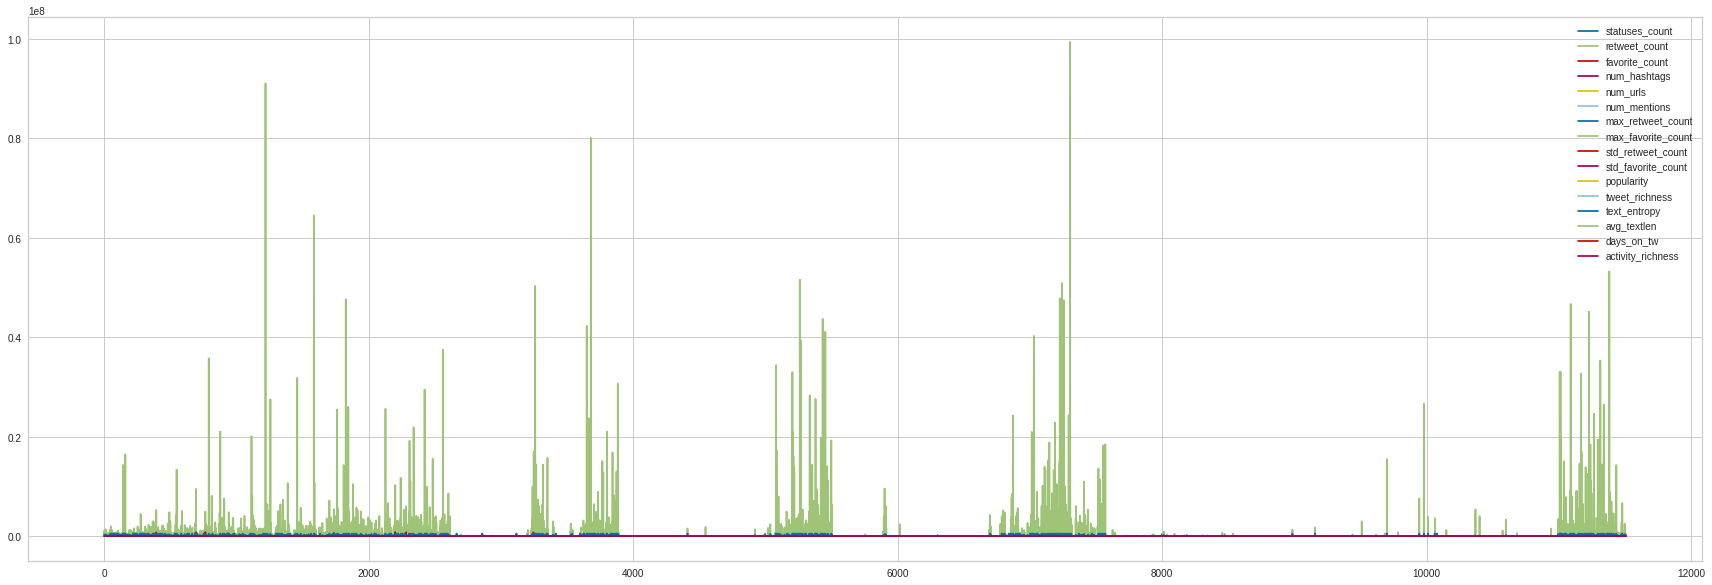

In [ ]:
users_profile.plot(figsize=(30,10))

In [ ]:
sns.pairplot(users_profile, palette = "Accent")

#Scatter plot based on dbscan on pairwise attributes 
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Data normalization
A good practice to avoid the bias given by the range of the different attribute is normalization.  
The most common adopted normalizations are: Z-Score and Min-Max.
In our project, we performed z-score normalization of the dataset, which standardizes features such that the mean of all of the values is 0 and the standard deviation is 1.

After that, we apply PCA (Principal Component Analysis)to reduce the dimension (columns) of a dataset through singular value decomposition (SVD) of linear algebra. The data expressed by the new abstract axis is more model-friendly.

In [ ]:
scaler = StandardScaler()

In [ ]:
users_profile.columns

Index(['statuses_count', 'retweet_count', 'favorite_count', 'num_hashtags',
       'num_urls', 'num_mentions', 'max_retweet_count', 'max_favorite_count',
       'std_retweet_count', 'std_favorite_count', 'popularity',
       'tweet_richness', 'text_entropy', 'avg_textlen', 'days_on_tw',
       'activity_richness'],
      dtype='object')

In [ ]:
X = scaler.fit_transform(users_profile.values)# when needed: pd.DataFrame(X, columns=users_profile.columns)

In [ ]:
X.shape

(11508, 16)

In [ ]:
# PCA
pca = PCA(n_components=2)
pca.fit_transform(X)

array([[ 3.6914535 , -2.58673178],
       [ 3.03443026, -0.07051814],
       [ 2.03005046, -1.71738891],
       ...,
       [-1.06983384,  0.21942606],
       [-1.92336712,  0.33044683],
       [ 0.59033895,  1.3628833 ]])

In [ ]:
print(pca.explained_variance_ratio_)

[0.27020166 0.16073584]


In [ ]:
print(pca.singular_values_)

[223.05087333 172.03478868]


In [ ]:
X.shape

(11508, 16)

# DBSCAN: density-based algorithm
Density-based clustering is a *nonparametric* approach where the clusters are considered to be dense regions of objects in a density distribution *p(x)*. 

**Density Based Spatial Clustering of Applications with Noise (DBSCAN)** is a pioneer density based algorithm: a clustering method that can discover clusters of arbitrary shape and also handles outliers effectively. DBSCAN obtains clusters by finding the number of points within the specified distance from a given point and involves computing distances from given point to all other points in the dataset. More thoroughly, the DBSCAN algorithm uses two parameters:
* MinPts: the minimum number of points (a threshold) clustered together for a region to be considered dense.
* epsilon ($\varepsilon$): a distance measure that will be used to locate the points in the neighborhood of any point.

There are three types of points after the DBSCAN clustering is complete:
* **core points:** those are the internal points of a cluster. A point is a core point if it has at least a specified number of points (MinPts) within a certain distance ($\varepsilon$) 
* **border points:** a point that has at least one Core point at a distance *n* ($\varepsilon$).
* **noise points:** a point that is neither a Core nor a Border and has less than *m* (MinPts) points within distance *n* ($\varepsilon$) from itself.

## Estimation of the best ε value

### Knee method with KNN (nearest neighbour algorithm) and Kneed

##### KNN


Now we need to perform KNN (Nearest Neighbour) but the choice of the k value is very critical. 

The algorithm works this way: 
* computation of the average distance between each point and its k nearest neighbors through the KNN algorithm
* sorting the k-distances in ascending order,
* plot of the sorted values on a k-distance graph.

On the choice of **k**:
* **small value:** noise will have a higher influence on the result. 
* **large value:** make it computationally expensive and kind of defeats the basic philosophy behind KNN (that points that are near might have similar densities or classes) 


A simple approach, which is the one we adopted, is to select k is to set `k=[2*dim(dataset)] - 1`

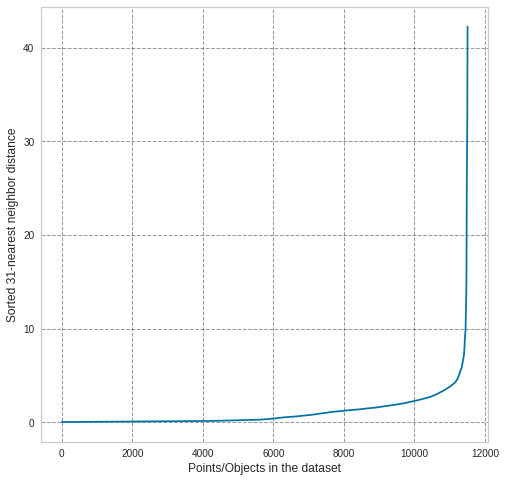

In [ ]:
from sklearn.neighbors import NearestNeighbors
#def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    

k = 2 * X.shape[-1] - 1 # k=2*{dim(dataset)} - 1
nbrs = NearestNeighbors(n_neighbors=k, radius=1.0).fit(X)

    # For each point, compute distances to its k-nearest neighbors
distances, indices = nbrs.kneighbors(X) 
                                       
distances = np.sort(distances, axis=0)
distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
plt.figure(figsize=(8,8))
plt.plot(distances)
plt.xlabel('Points/Objects in the dataset', fontsize=12)
plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
plt.grid(True, linestyle="--", color='black', alpha=0.4)
plt.show()
plt.close()

#get_kdist_plot(X=X, k=k)

In [ ]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

##### Kneed package


Considering the knee in the Nearest Neighbour plot, we would set the ideal value for ε around **0.2**. To have a better insight on the actual plot, we use the package **kneed** and locate the exact knee point.

Kneed is an implementation of the *kneedle* algorithm: given a set of x and y values, kneed will return the knee point of the function. The knee point is the point of maximum curvature.

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Knee:  9813
Optimum value:  2.112191810711597


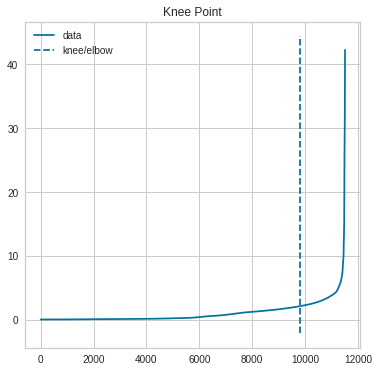

In [ ]:
import kneed
from kneed import KneeLocator

kneedle = kneed.KneeLocator(range(1,len(distances)+1),  #x values
                      sorted(distances), # y values
                      curve="convex", #parameter from figure
                      direction="increasing",
                      online= True) #parameter from figure)
knee_point = kneedle.knee #elbow_point = kneedle.elbow
print('Knee: ', knee_point) 
print('Optimum value: ', kneedle.knee_y)
kneedle.plot_knee()

Looks like the best epsilon value is approximately **2.11**, but we might also try to test the DBSCAN going higher too.

### Running DBSCAN with found ε and default min_samples

In [ ]:
dbscan0 = DBSCAN(eps=2)
dbscan0.fit(X)

DBSCAN(eps=2)

In [ ]:
np.unique(dbscan0.labels_, return_counts=True) 

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([  700, 10705,    20,     7,     5,     8,     6,     3,    17,
           22,    11,     4]))

In [ ]:
# Number of Clusters
labels0=dbscan0.labels_
N_clus=len(set(labels0))-(1 if -1 in labels0 else 0)
print('Estimated number of clusters: %d' % N_clus)

Estimated number of clusters: 11


In [ ]:
# Identify Noise
n_noise = list(dbscan0.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise) #the number of noise points detected is very high!

Estimated no. of noise points: 700


In [ ]:
print("Davies-Bouldin Score:",(davies_bouldin_score(X, dbscan0.labels_)))
print("Silhouette Score:",(silhouette_score(X, dbscan0.labels_)))
print("Calinski-Harabasz Score:",(calinski_harabasz_score(X, dbscan0.labels_)))

Davies-Bouldin Score: 1.52818937001767
Silhouette Score: 0.40907226633294014
Calinski-Harabasz Score: 197.39129717752758


### Checking hyperparameters through grid search

In this section, we compute a grid search that takes into consideration the KNN results, the estimated number of clusters and the Silhouette Score, the Davies-Bouldin Score and the Calinski-Harabasz Score for the DBSCAN clustering for each selected value of eps and min_samples.

About the min_samples value, we test it starting from 4. This choice stems from our research checking papers about estimation of hyperparameters: it seems that if the data has more than 2 dimensions, choosing approximately MinPts = 2*dim (where dim= the dimensions of the dataset) is optimal. On the other hand, in case of 2-dimensional data like ours after PCA, a good choice is the default value 4. 



In [ ]:
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning

def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(X)

     # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan_model_.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan_model_.labels_[dbscan_model_.labels_ >= 0]))

    # Silhouette Score ==============================================

    silhouette = silhouette_score(dataset, dbscan_model_.labels_)

    # Davies-Bouldin Score ==============================================

    d_b_score = davies_bouldin_score(dataset, dbscan_model_.labels_)

    # Calinski-Harabasz Score ==============================================

    c_h_score = calinski_harabasz_score(dataset, dbscan_model_.labels_)
    
     # Log ==========================================================================
    
    print("%3d \t| Tested with eps = %3s and min_samples = %3s |\t %5s \t %4s \t %5s \t\t %5s \t\t %5s" % 
          (iter_, eps, min_samples, str(f"{noise_mean_distance:.2f}"), number_of_clusters, str(f"{silhouette:.3f}"), str(f"{d_b_score:.3f}"), str(f"{c_h_score:.3f}")))
        
    return(noise_mean_distance, number_of_clusters, silhouette, d_b_score, c_h_score)

In [ ]:
eps_to_test = [2,3,4,5]
min_samples_to_test = list(np.arange(4,33,2)) #I start directly from 32 because a good rule is:
                                    #If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set
                                    #In this case: 2*16 = 32

# Dataframe for metrics on mean distance of noise points from the K nearest points
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe for metrics on the number of clusters
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

results_silhouette = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

results_db = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

results_ch = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

iter_ = 0

print("ITER\t| INFO%s\t| DIST \t CLUS \t SILHOUETTE  DAVIES-BOULDIN  CALINSKI-HARABASZ" % (" "*40))
print("-"*150)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # metrics 
        noise_metric, cluster_metric, silhouette_metric, db_metric, ch_metric = get_metrics(eps, min_samples, X, iter_)
        
        # Inserting results in the df
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric
        results_silhouette.loc[eps, min_samples] = silhouette_metric
        results_db.loc[eps, min_samples] = db_metric
        results_ch.loc[eps, min_samples] = ch_metric

ITER	| INFO                                        	| DIST 	 CLUS 	 SILHOUETTE  DAVIES-BOULDIN  CALINSKI-HARABASZ
------------------------------------------------------------------------------------------------------------------------------------------------------
  1 	| Tested with eps =   2 and min_samples =   4 |	  3.26 	   14 	 0.301 		 1.560 		 158.030
  2 	| Tested with eps =   2 and min_samples =   6 |	  3.11 	    9 	 0.466 		 1.510 		 235.720
  3 	| Tested with eps =   2 and min_samples =   8 |	  3.01 	    4 	 0.549 		 1.524 		 485.080
  4 	| Tested with eps =   2 and min_samples =  10 |	  2.94 	    3 	 0.561 		 1.585 		 615.048
  5 	| Tested with eps =   2 and min_samples =  12 |	  2.87 	    2 	 0.576 		 1.676 		 909.932
  6 	| Tested with eps =   2 and min_samples =  14 |	  2.84 	    2 	 0.576 		 1.672 		 915.895
  7 	| Tested with eps =   2 and min_samples =  16 |	  2.79 	    2 	 0.576 		 1.668 		 916.212
  8 	| Tested with eps =   2 and min_samples =  18 |	  2.72 	    1 	 0

From this grid search we infer that the best eps/min_samples combinations are the ones with `min_samples = 8` and:


All those combinations infer 2 highly distinguishable clusters.

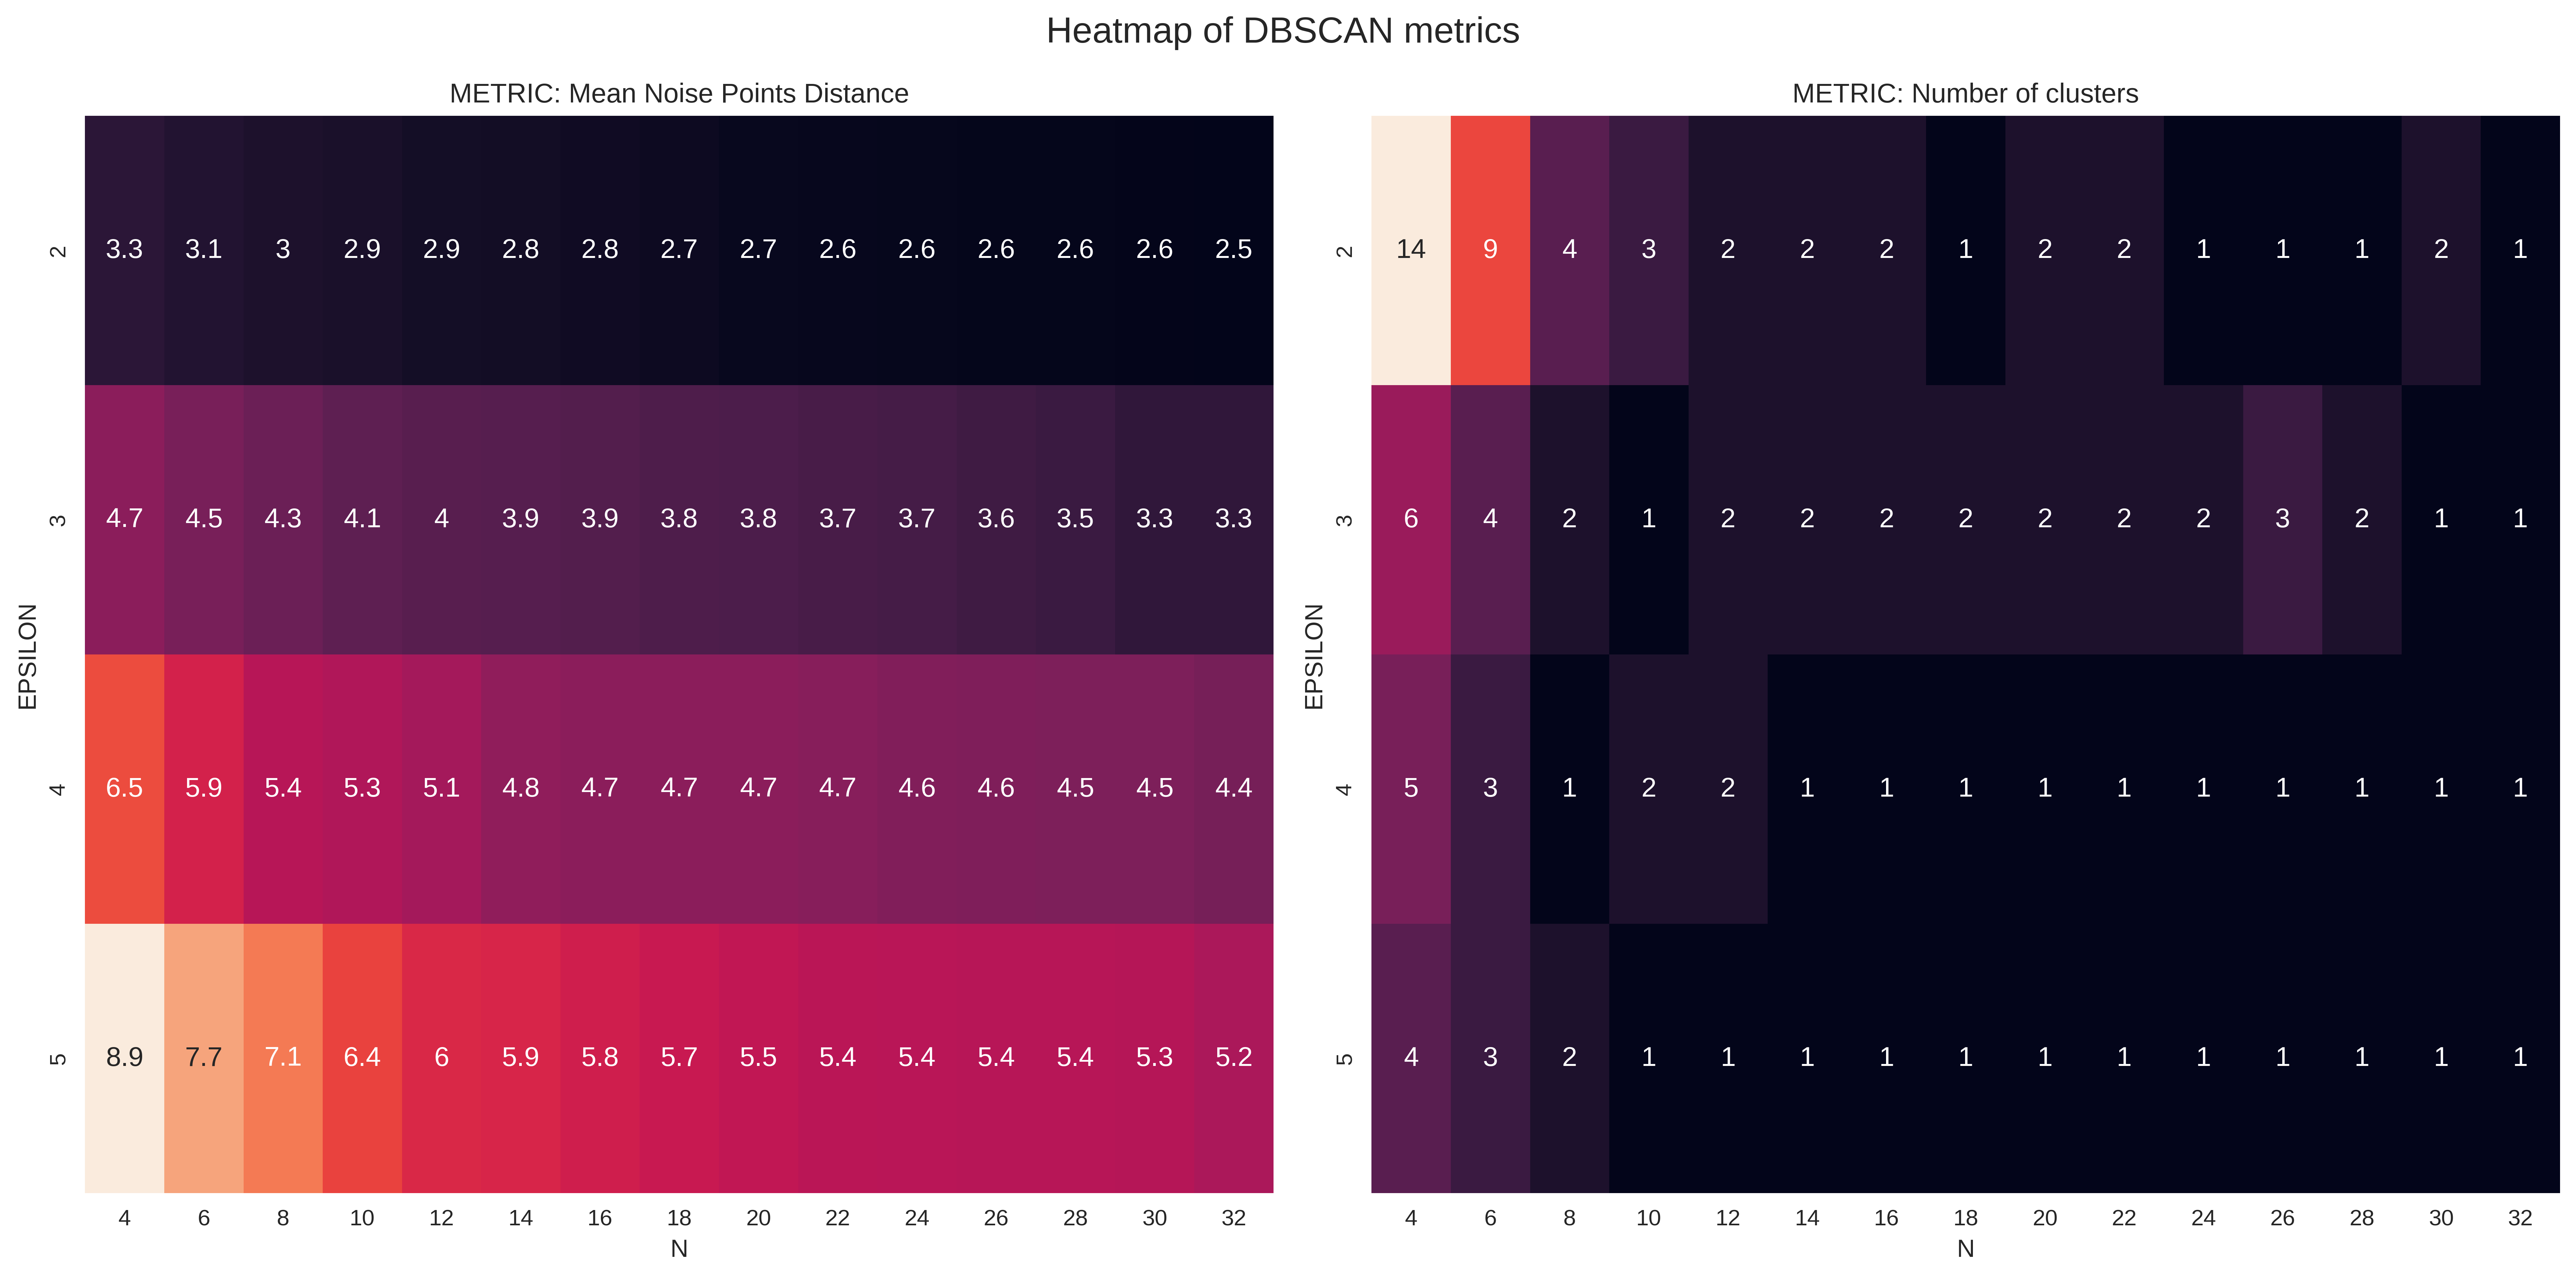

In [ ]:
#heatmap on metrics obtained before
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8), dpi=500 )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

fig.suptitle('Heatmap of DBSCAN metrics ', fontsize=16)
plt.tight_layout(); plt.show()

# DBSCAN clustering with the grid search's results 


##### DBSCAN with eps = 2 and min_samples = 16

In [ ]:
dbscan1 = DBSCAN(eps=2, min_samples=16) 
dbscan1.fit(X)

DBSCAN(eps=2, min_samples=16)

In [ ]:
np.unique(dbscan1.labels_, return_counts=True) 

(array([-1,  0,  1]), array([  972, 10520,    16]))

In [ ]:
# Number of Clusters
labels1=dbscan1.labels_
N_clus=len(set(labels1))-(1 if -1 in labels1 else 0)
print('Estimated number of clusters: %d' % N_clus)

Estimated number of clusters: 2


In [ ]:
# Identify Noise
n_noise = list(dbscan1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise) 

Estimated no. of noise points: 972


##### DBSCAN with eps = 3 and min_samples = 8

In [ ]:
dbscan2 = DBSCAN(eps=3, min_samples=8) 
dbscan2.fit(X)

DBSCAN(eps=3, min_samples=8)

In [ ]:
np.unique(dbscan2.labels_, return_counts=True) 

(array([-1,  0,  1]), array([  270, 11228,    10]))

In [ ]:
# Number of Clusters
labels2=dbscan2.labels_
N_clus=len(set(labels2))-(1 if -1 in labels2 else 0)
print('Estimated number of clusters: %d' % N_clus)

Estimated number of clusters: 2


In [ ]:
# Identify Noise
n_noise = list(dbscan2.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise) 

Estimated no. of noise points: 270


##### DBSCAN with eps = 4 and min_samples = 6

In [ ]:
dbscan3 = DBSCAN(eps=4, min_samples=6) 
dbscan3.fit(X)

DBSCAN(eps=4, min_samples=6)

In [ ]:
np.unique(dbscan3.labels_, return_counts=True) 

(array([-1,  0,  1,  2]), array([   95, 11399,     7,     7]))

In [ ]:
# Number of Clusters
labels3=dbscan3.labels_
N_clus=len(set(labels3))-(1 if -1 in labels3 else 0)
print('Estimated number of clusters: %d' % N_clus)

Estimated number of clusters: 3


In [ ]:
# Identify Noise
n_noise = list(dbscan3.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise) 

Estimated no. of noise points: 95


##### DBSCAN with eps = 5 and min_samples = 8

In [ ]:
dbscan4 = DBSCAN(eps=5, min_samples=8) 
dbscan4.fit(X)

DBSCAN(eps=5, min_samples=8)

In [ ]:
np.unique(dbscan4.labels_, return_counts=True) 

(array([-1,  0,  1]), array([   51, 11449,     8]))

In [ ]:
# Number of Clusters
labels4=dbscan4.labels_
N_clus=len(set(labels4))-(1 if -1 in labels4 else 0)
print('Estimated number of clusters: %d' % N_clus)

Estimated number of clusters: 2


In [ ]:
# Identify Noise
n_noise = list(dbscan4.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise) 

Estimated no. of noise points: 51


### Data visualization 

In [ ]:
users_profile.loc[ : , ~users_profile.columns.isin(['dbscan_labels'])].corr()

statuses_count  retweet_count  favorite_count  \
statuses_count            1.000000       0.165005        0.012030   
retweet_count             0.165005       1.000000        0.067799   
favorite_count            0.012030       0.067799        1.000000   
num_hashtags              0.307346       0.153684        0.055285   
num_urls                  0.324522       0.043044        0.038395   
num_mentions              0.562791       0.316225        0.049466   
max_retweet_count         0.260234       0.524070        0.019821   
max_favorite_count        0.058355       0.048682        0.288178   
std_retweet_count         0.157174       0.667045        0.049974   
std_favorite_count       -0.019404       0.028207        0.466686   
popularity                0.046735       0.448862        0.123324   
tweet_richness            0.130808       0.071211        0.059043   
text_entropy              0.390239       0.194193        0.015674   
avg_textlen               0.008527      -0.019312        0.088749   
days_on_tw                0.306761       0.019498        0.055650   
activity_richness         0.441564       0.287950        0.030397   

                    num_hashtags  num_urls  num_mentions  max_retweet_count  \
statuses_count          0.307346  0.324522      0.562791           0.260234   
retweet_count           0.153684  0.043044      0.316225           0.524070   
favorite_count          0.055285  0.038395      0.049466           0.019821   
num_hashtags            1.000000  0.330799      0.495764           0.258190   
num_urls                0.330799  1.000000      0.281933           0.118013   
num_mentions            0.495764  0.281933      1.000000           0.466660   
max_retweet_count       0.258190  0.118013      0.466660           1.000000   
max_favorite_count      0.067219  0.095041      0.073451           0.079551   
std_retweet_count       0.161224  0.038344      0.304692           0.768317   
std_favorite_count      0.001766 -0.004031     -0.016033           0.047868   
popularity              0.051397 -0.004221      0.112579           0.323226   
tweet_richness          0.306916  0.185009      0.284764           0.143023   
text_entropy            0.335132  0.289516      0.525943           0.297703   
avg_textlen             0.255868  0.263621      0.065373          -0.016815   
days_on_tw              0.268445  0.314916      0.283215           0.175121   
activity_richness       0.382203  0.521873      0.663045           0.413420   

                    max_favorite_count  std_retweet_count  std_favorite_count  \
statuses_count                0.058355           0.157174           -0.019404   
retweet_count                 0.048682           0.667045            0.028207   
favorite_count                0.288178           0.049974            0.466686   
num_hashtags                  0.067219           0.161224            0.001766   
num_urls                      0.095041           0.038344           -0.004031   
num_mentions                  0.073451           0.304692           -0.016033   
max_retweet_count             0.079551           0.768317            0.047868   
max_favorite_count            1.000000           0.229281            0.646514   
std_retweet_count             0.229281           1.000000            0.375111   
std_favorite_count            0.646514           0.375111            1.000000   
popularity                    0.309205           0.761421            0.667487   
tweet_richness                0.049502           0.119150            0.052472   
text_entropy                  0.063574           0.184251           -0.032822   
avg_textlen                   0.168527           0.091734            0.230110   
days_on_tw                    0.099156           0.108707            0.076952   
activity_richness             0.112104           0.261621           -0.037039   

                    popularity  tweet_richness  text_entropy  avg_textlen  \
statuses_count        0.046735        0.130808 

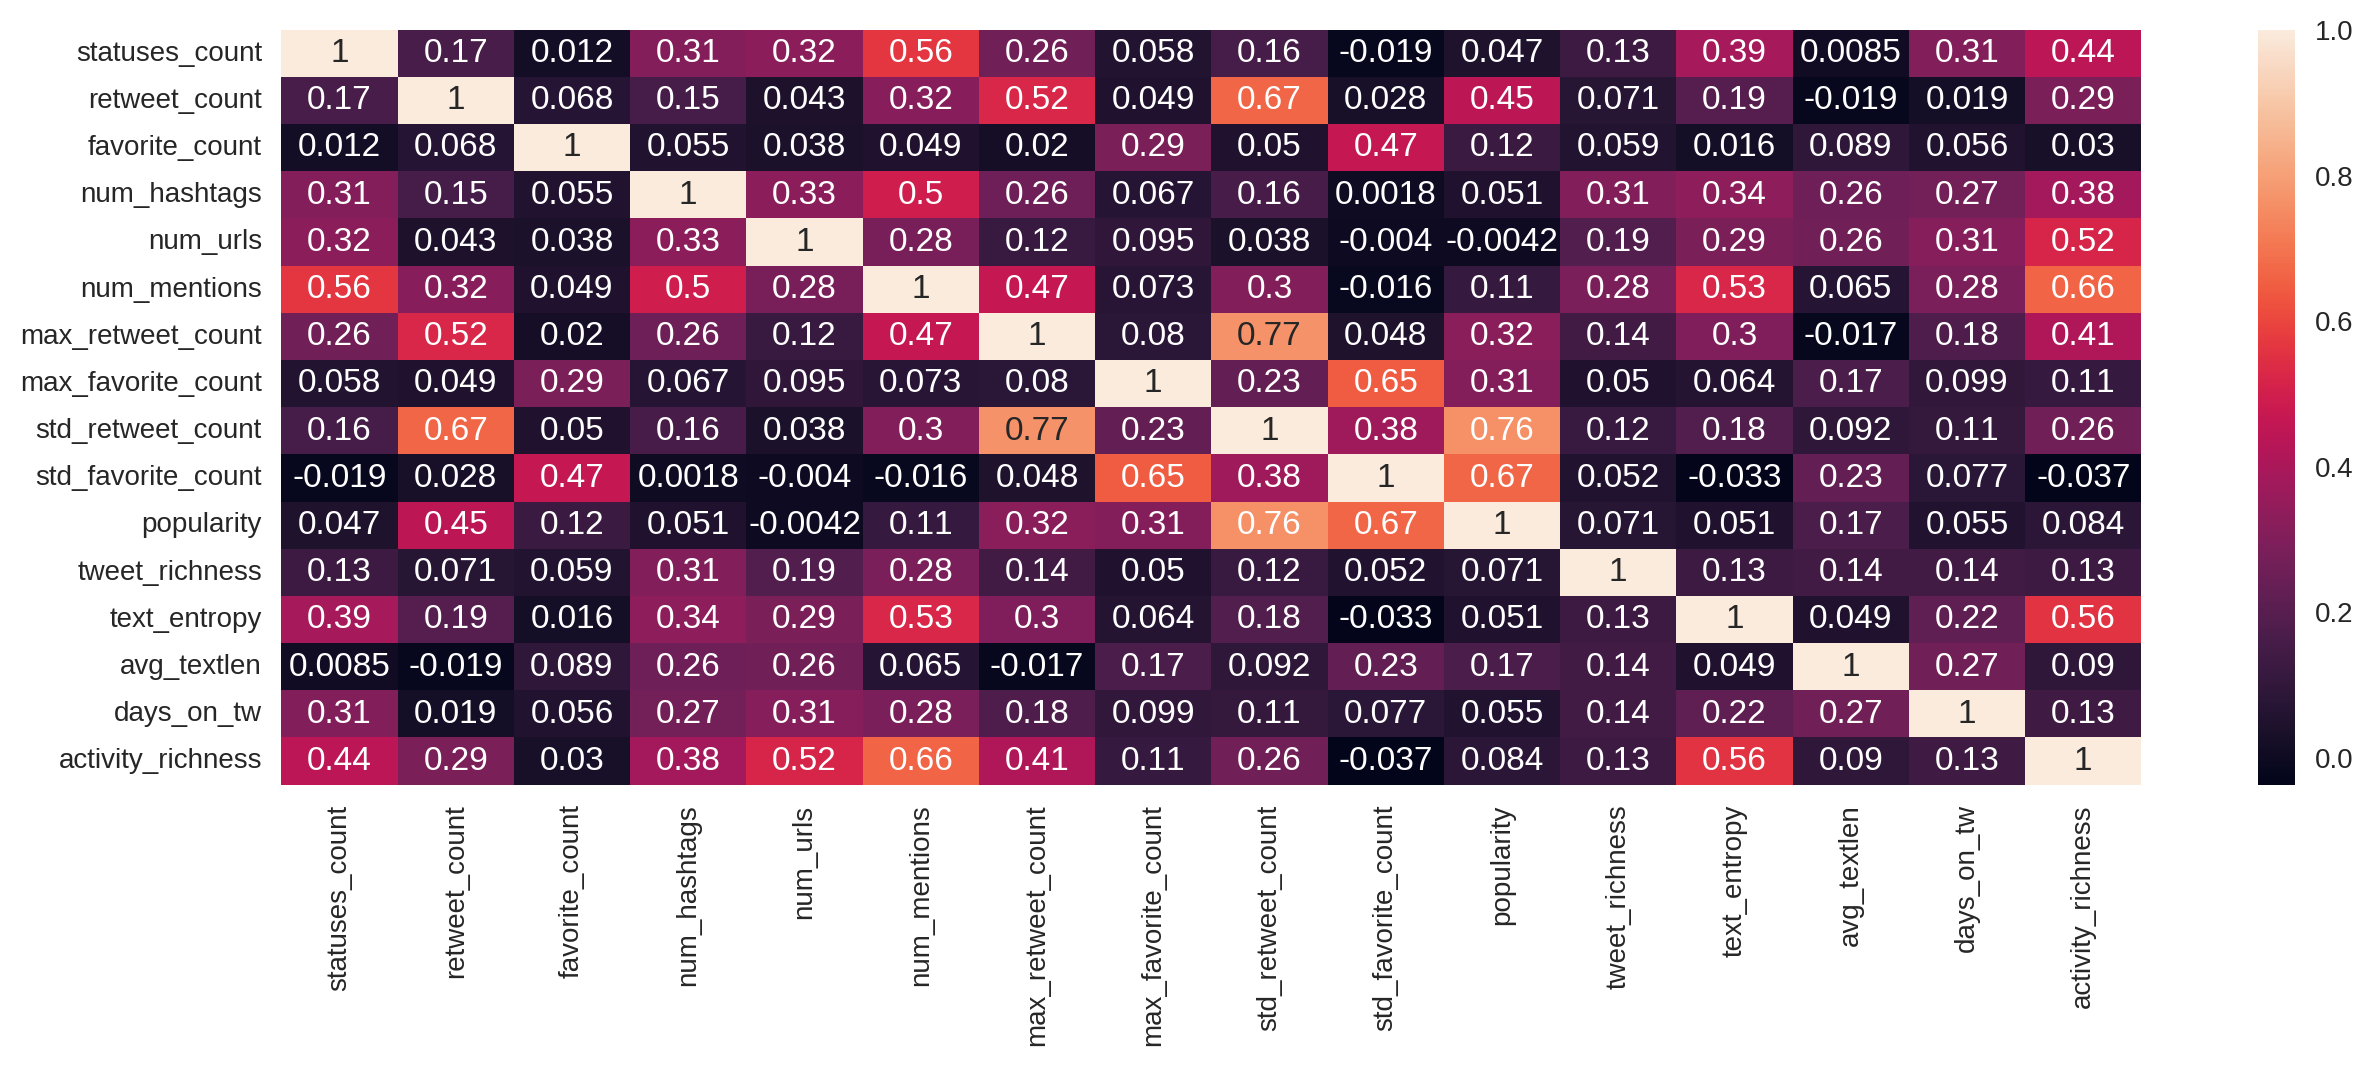

In [ ]:
plt.figure(figsize = (15, 5),dpi=200)
sns.heatmap(users_profile.loc[ : , ~users_profile.columns.isin(['dbscan_labels'])].corr(), annot=True)
plt.show()

#### Plotting DBSCAN clusters

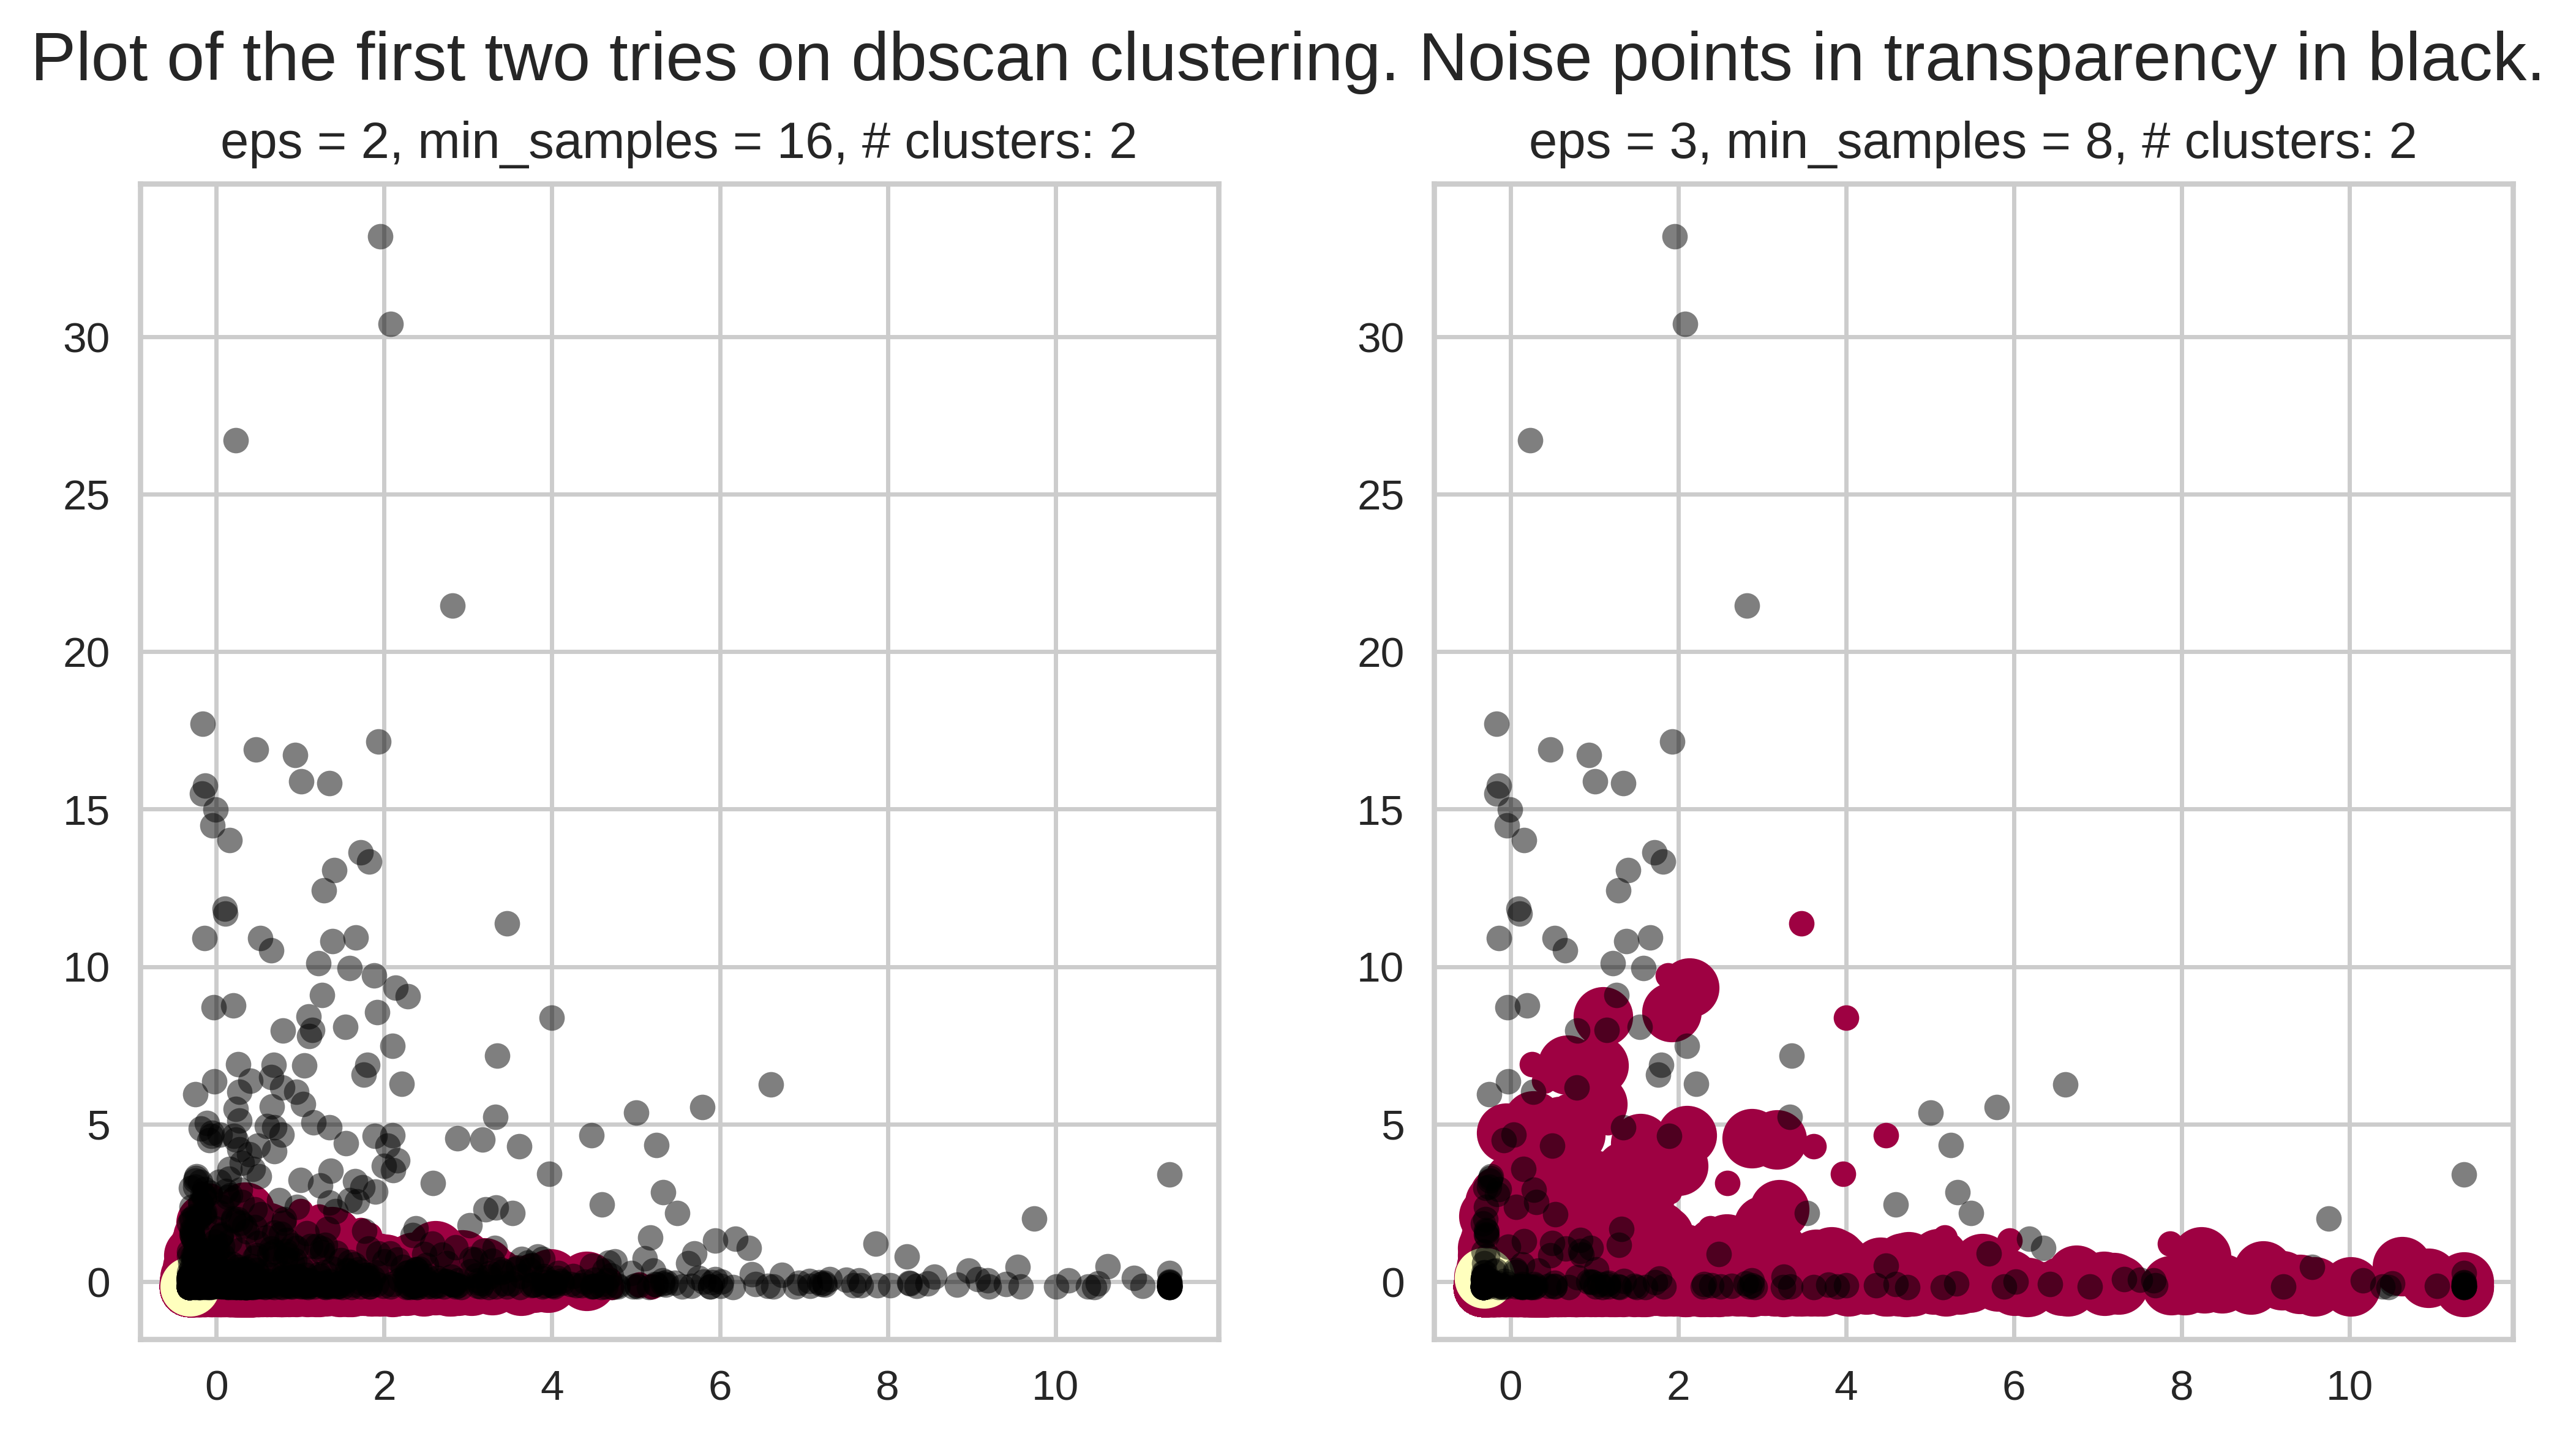

<Figure size 576x396 with 0 Axes>

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=500)

core_samples_mask1 = np.zeros_like(dbscan1.labels_, dtype=bool)
core_samples_mask1[dbscan1.core_sample_indices_] = True
labels1 = dbscan1.labels_

core_samples_mask2 = np.zeros_like(dbscan2.labels_, dtype=bool)
core_samples_mask2[dbscan2.core_sample_indices_] = True
labels2 = dbscan2.labels_


n_clusters1_ = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_noise1_ = list(labels1).count(-1)

n_clusters2_ = len(set(labels2)) - (1 if -1 in labels2 else 0)
n_noise2_ = list(labels2).count(-1)

unique_labels1 = set(labels1)
colors1 = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels1))]
for k, col in zip(unique_labels1, colors1):
    if k == -1:
        # white used for noise.
        col = [0,0,0,0.5]

    class_member_mask = labels1 == k

    xy = X[class_member_mask & core_samples_mask1]
    ax1.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14
    )

    xy = X[class_member_mask & ~core_samples_mask1]
    ax1.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6
    )  



unique_labels2 = set(labels2)
colors2 = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels2))]
for k, col in zip(unique_labels2, colors2):
    if k == -1:
        # black used for noise.
        col = [0,0,0,0.5]

    class_member_mask = labels2 == k

    xy = X[class_member_mask & core_samples_mask2]
    ax2.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14
    )

    xy = X[class_member_mask & ~core_samples_mask2]
    ax2.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6
    )

ax1.set_title("eps = 2, min_samples = 16, # clusters: %d" % n_clusters1_)
ax2.set_title("eps = 3, min_samples = 8, # clusters: %d" % n_clusters2_)

fig.suptitle('Plot of the first two tries on dbscan clustering. Noise points in transparency in black.', fontsize=16)
fig = plt.figure()
fig.show()

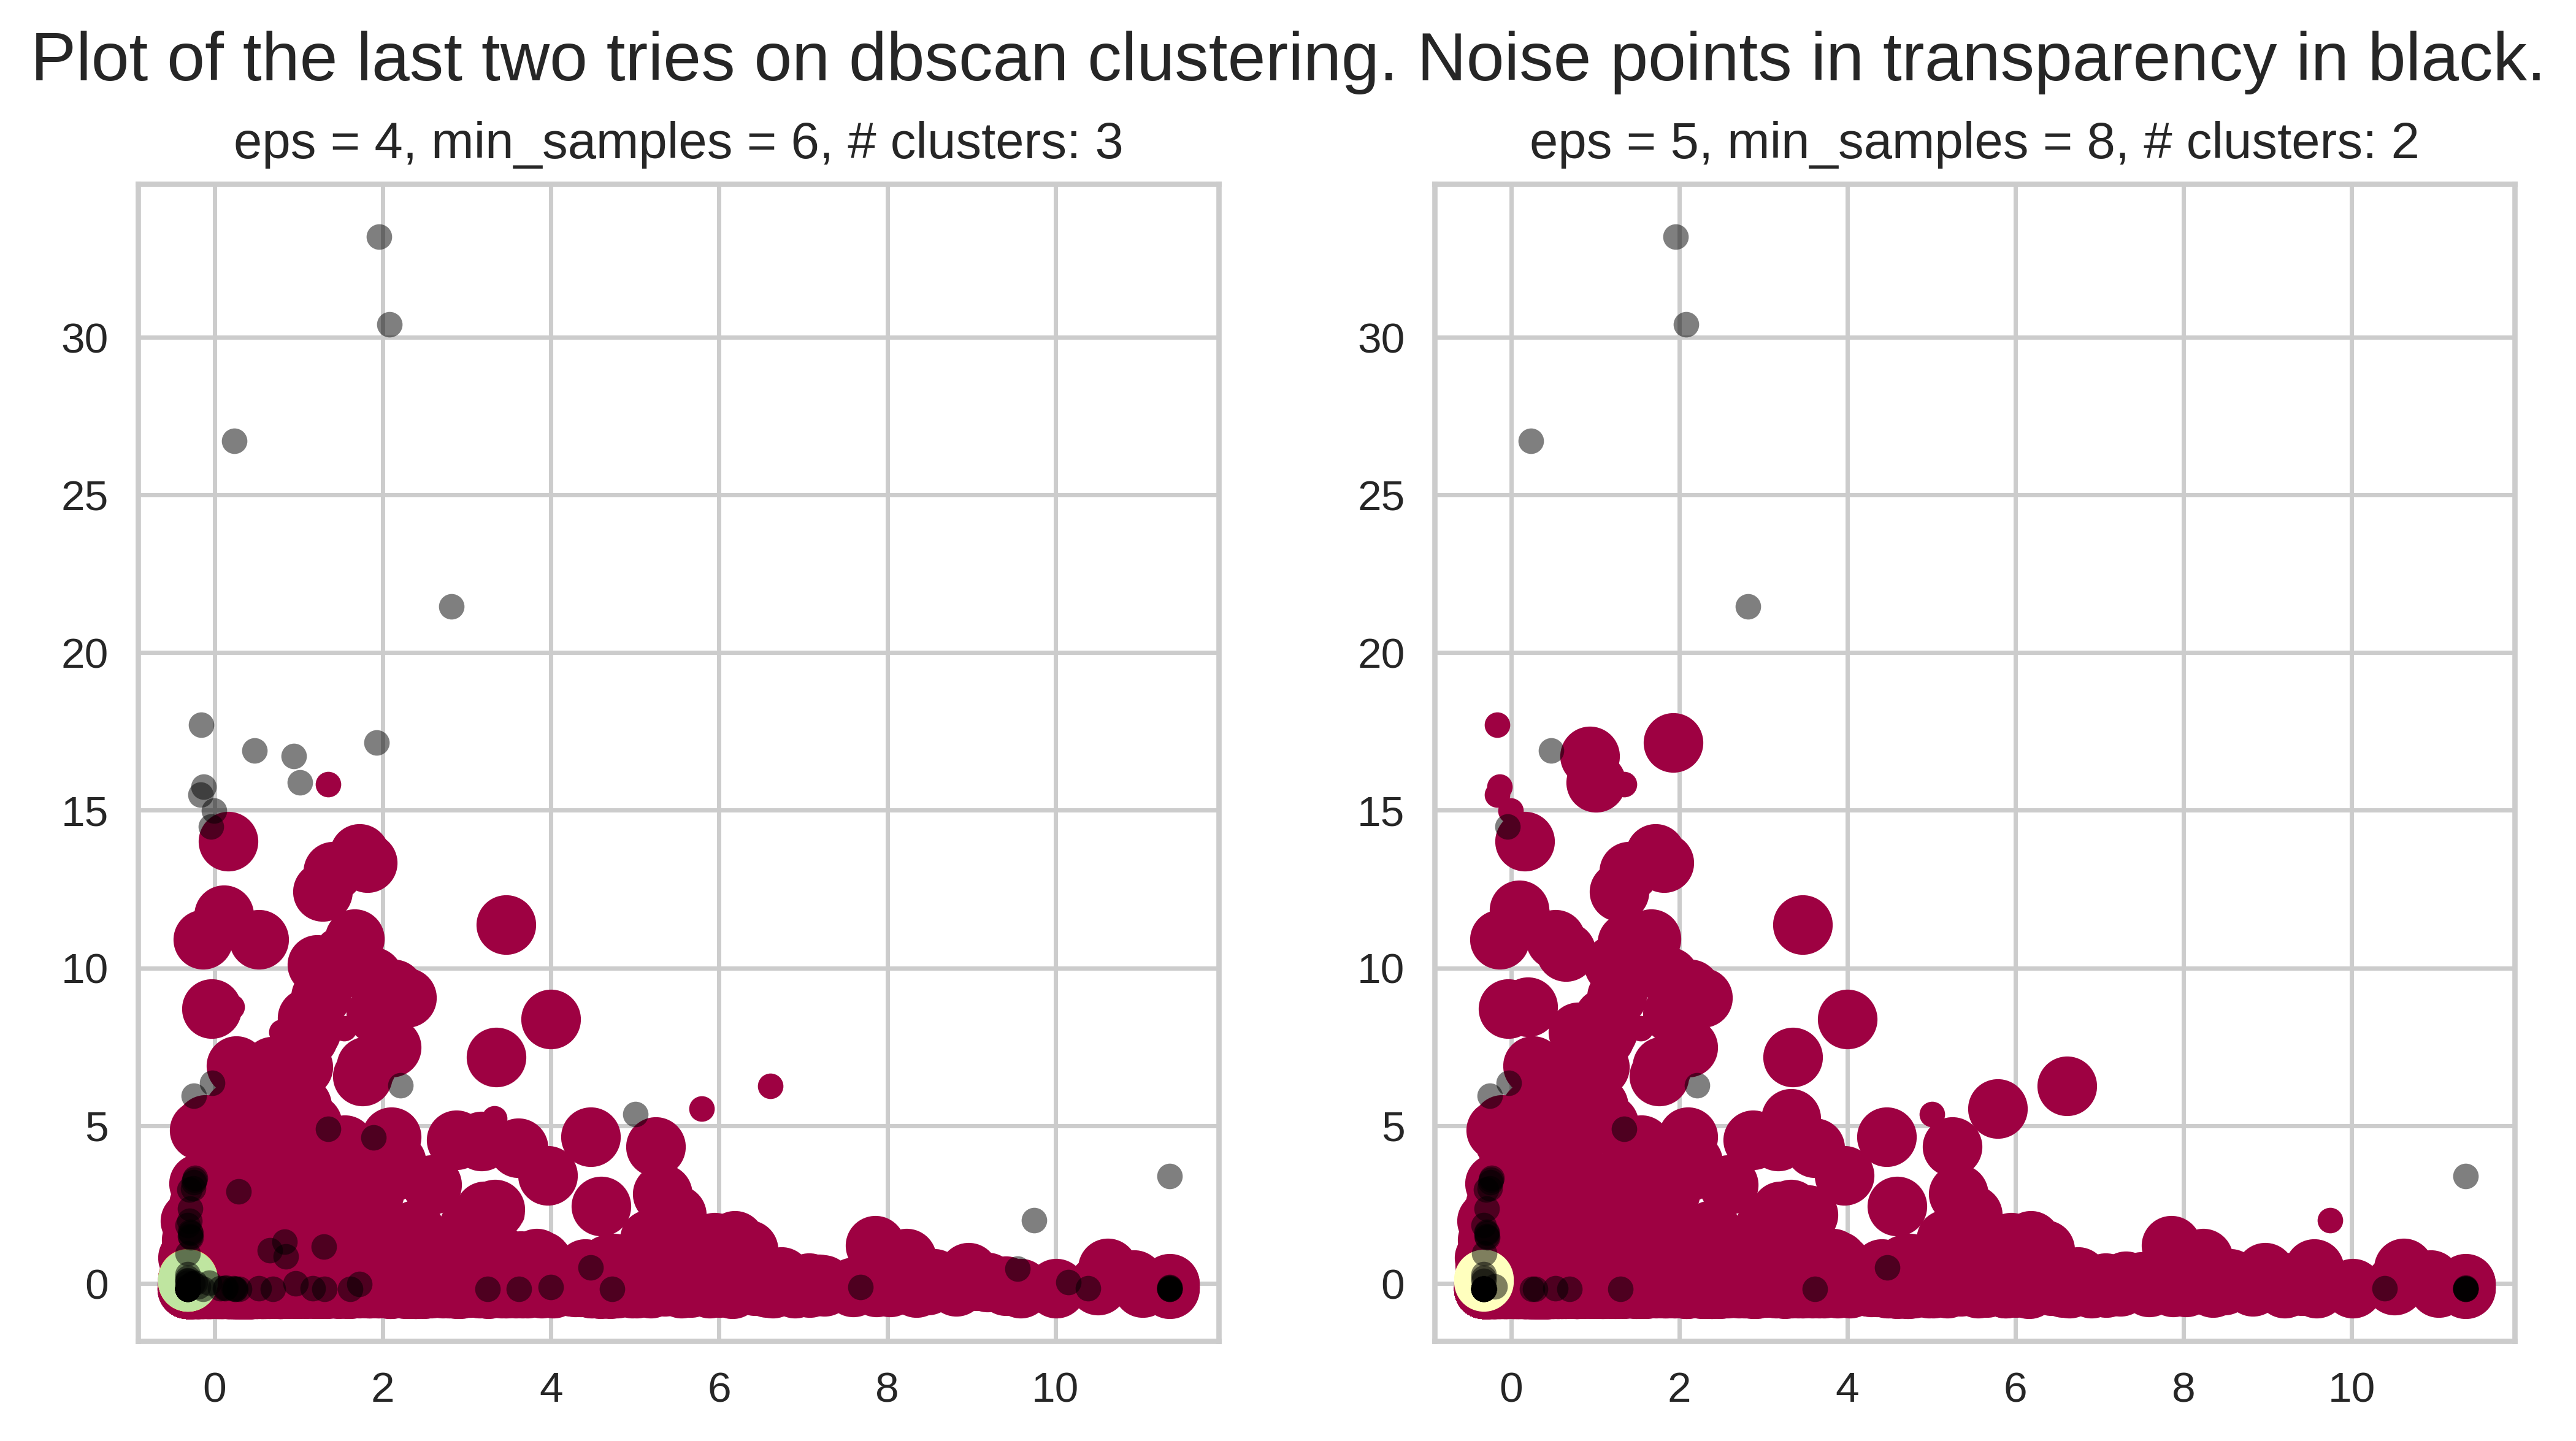

<Figure size 20000x20000 with 0 Axes>

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=500)

core_samples_mask1 = np.zeros_like(dbscan3.labels_, dtype=bool)
core_samples_mask1[dbscan3.core_sample_indices_] = True
labels1 = dbscan3.labels_

core_samples_mask2 = np.zeros_like(dbscan4.labels_, dtype=bool)
core_samples_mask2[dbscan4.core_sample_indices_] = True
labels2 = dbscan4.labels_


n_clusters1_ = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_noise1_ = list(labels1).count(-1)

n_clusters2_ = len(set(labels2)) - (1 if -1 in labels2 else 0)
n_noise2_ = list(labels2).count(-1)

unique_labels1 = set(labels1)
colors1 = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels1))]
for k, col in zip(unique_labels1, colors1):
    if k == -1:
        # black used for noise.
        col = [0,0,0,0.5]

    class_member_mask = labels1 == k

    xy = X[class_member_mask & core_samples_mask1]
    ax1.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14
    )

    xy = X[class_member_mask & ~core_samples_mask1]
    ax1.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6
    )  



unique_labels2 = set(labels2)
colors2 = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels2))]
for k, col in zip(unique_labels2, colors2):
    if k == -1:
        # black used for noise.
        col = [0,0,0,0.5]

    class_member_mask = labels2 == k

    xy = X[class_member_mask & core_samples_mask2]
    ax2.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14
    )

    xy = X[class_member_mask & ~core_samples_mask2]
    ax2.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6
    )

ax1.set_title("eps = 4, min_samples = 6, # clusters: %d" % n_clusters1_)
ax2.set_title("eps = 5, min_samples = 8, # clusters: %d" % n_clusters2_)

fig.suptitle('Plot of the last two tries on dbscan clustering. Noise points in transparency in black.', fontsize=16)
fig = plt.figure(figsize=(20, 20), dpi=1000)
fig.show()

# Clusters characterization
In this section the data obtained from the clustering is plotted and analyzed in order to find interesting patterns and results to give an identity to the grouped data. Our considerations are written in the final report.

We now focus on the first two dbscan clusterings:
* eps=2 and min_samples=16
* eps=3 and min_samples=8
being the best ones in detecting outliers and at the same time the one with the most definite clusters according to the Silhouette Score.

### With respect to categorical features

In [ ]:
users_profile_all = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile.csv', lineterminator='\n')

In [ ]:
users_profile_all.head()

user_id                  name lang  bot      user_created_at  \
0   678033          Heather Gold   en    0  2012-01-24 01:57:38   
1   722623          Buzz Jackson   en    0  2012-01-31 00:54:34   
2   755116                    呉⚛   en    0  2012-02-08 05:25:49   
3   755746  Sarah Friedlander G.   en    0  2012-02-09 05:21:24   
4   785080                   W H   en    0  2012-02-23 01:08:16   

   statuses_count  retweet_count  reply_count  favorite_count  num_hashtags  \
0           45825       187157.0          0.0          1201.0         868.0   
1           11770      1158520.0          0.0           969.0         766.0   
2           39158        92396.0          0.0           391.0          77.0   
3           18035       317861.0          0.0           209.0         488.0   
4           22496       138486.0          0.0          1714.0         185.0   

   ...  hour_entropy  favcount_entropy  retcount_entropy  repcount_entropy  \
0  ...           0.0          8.831943          6.080426               0.0   
1  ...           0.0          0.000000          0.000000               0.0   
2  ...           0.0          3.921117          2.375534               0.0   
3  ...           0.0          0.000000          0.000000               0.0   
4  ...           0.0          8.277790          2.354578               0.0   

   has_entropy  url_entropy  men_entropy  avg_textlen  days_on_tw  \
0     9.183814     9.578214    10.607494   109.637321        3900   
1     0.000000     0.000000     0.000000    85.026719        3893   
2     4.836434     5.114369     6.387527    80.780317        3885   
3     0.000000     0.000000     0.000000    84.281111        3884   
4     8.421512     8.222893     9.556485    95.166473        3870   

   activity_richness  
0           0.608718  
1           0.519137  
2           0.551866  
3           0.519310  
4           0.887855  

[5 rows x 33 columns]

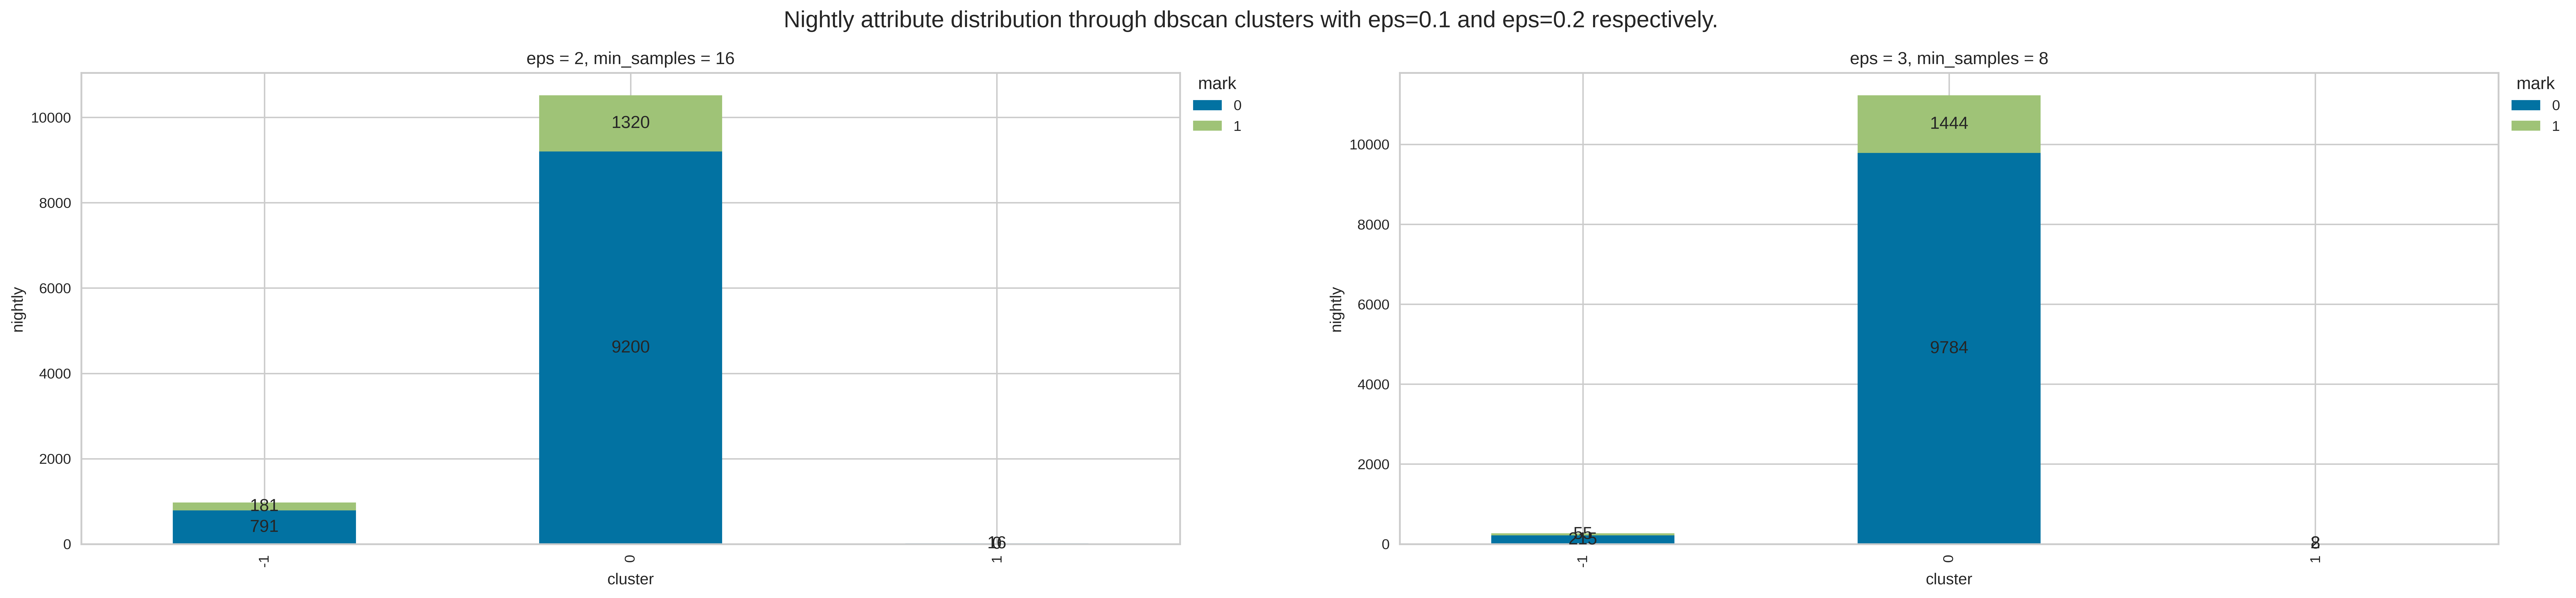

In [ ]:
nightly_ct1 = pd.crosstab(dbscan1.labels_,users_profile_all['nightly'])

f, axs = plt.subplots(ncols=2, figsize=(30,6), dpi=500)

ax1 = nightly_ct1.plot(kind='bar', stacked=True, title='eps = 2, min_samples = 16', ax=axs[0])
ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
# add counts
for c in ax1.containers:
    # set the bar label
    ax1.bar_label(c, label_type='center')
axs[0].set_xlabel('cluster')
axs[0].set_ylabel('nightly')

nightly_ct2 = pd.crosstab(dbscan2.labels_,users_profile_all['nightly'])
ax2 = nightly_ct2.plot(kind='bar', stacked=True, title='eps = 3, min_samples = 8', ax=axs[1])
ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
# add counts
for c in ax2.containers:
    # set the bar label
    ax2.bar_label(c, label_type='center')
axs[1].set_xlabel('cluster')
axs[1].set_ylabel('nightly')

f.suptitle('Nightly attribute distribution through dbscan clusters with eps=0.1 and eps=0.2 respectively.', fontsize=16)

plt.show()

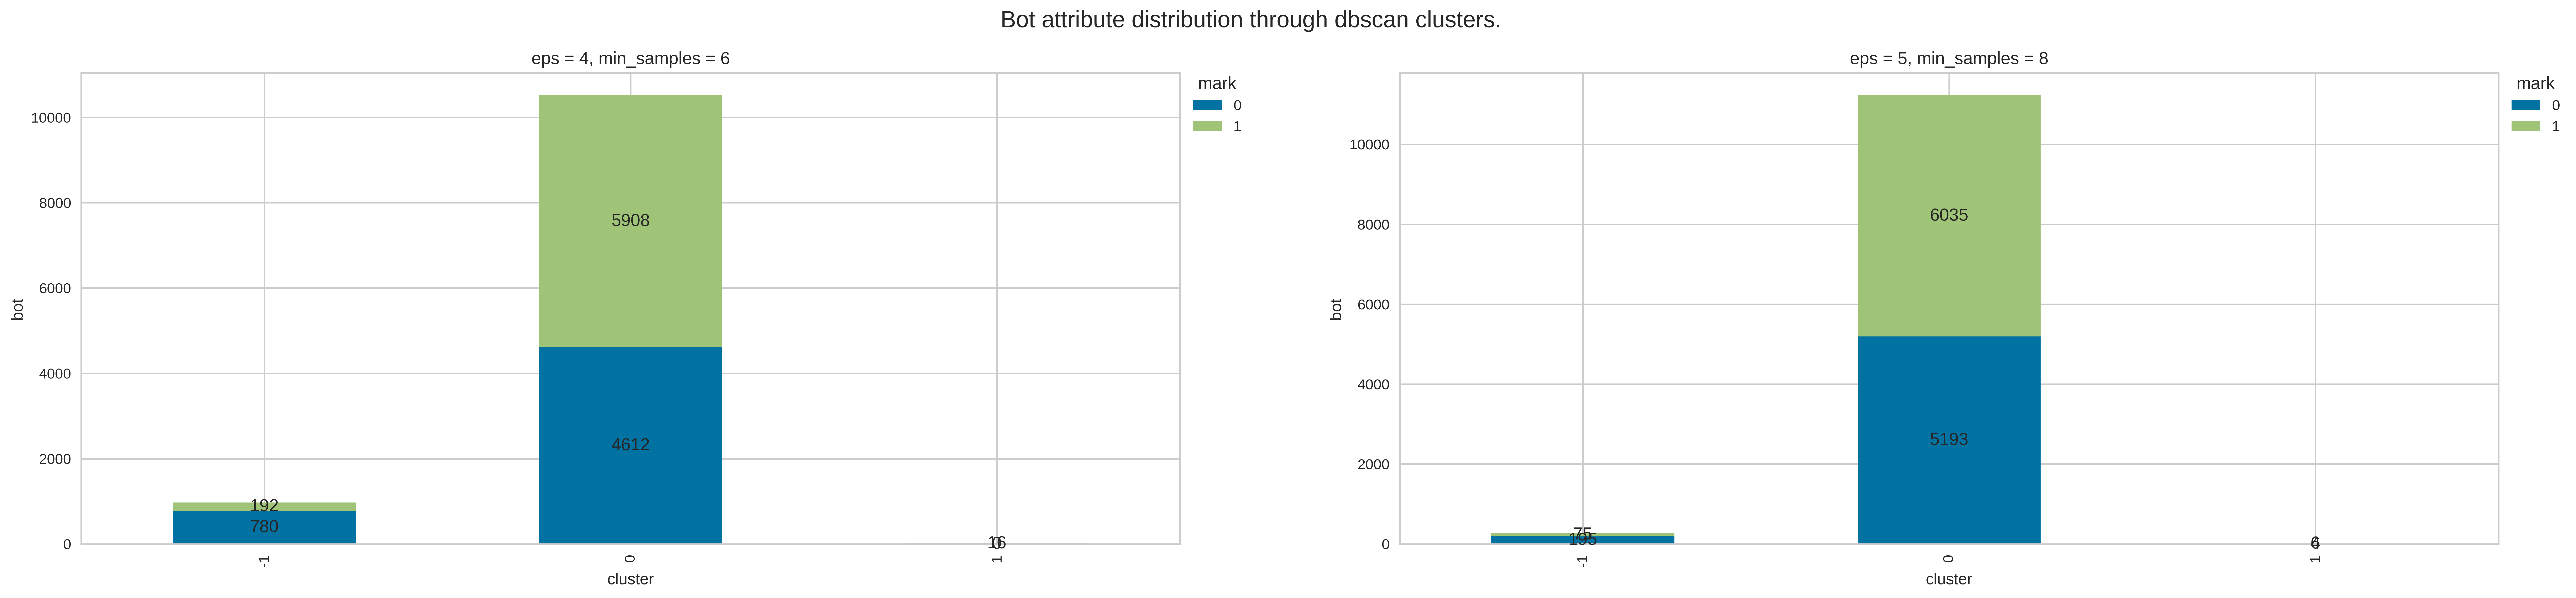

In [ ]:
bot_ct1 = pd.crosstab(dbscan1.labels_,users_profile_all['bot'])

f, axs = plt.subplots(ncols=2, figsize=(30,6),  dpi=500)

ax1 = bot_ct1.plot(kind='bar', stacked=True, title='eps = 4, min_samples = 6', ax=axs[0])
ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
# add counts
for c in ax1.containers:
    # set the bar label
    ax1.bar_label(c, label_type='center')
axs[0].set_xlabel('cluster')
axs[0].set_ylabel('bot')

bot_ct2 = pd.crosstab(dbscan2.labels_,users_profile_all['bot'])

ax2 = bot_ct2.plot(kind='bar', stacked=True, title='eps = 5, min_samples = 8', ax=axs[1])
ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
# add counts
for c in ax2.containers:
    # set the bar label
    ax2.bar_label(c, label_type='center')
axs[1].set_xlabel('cluster')
axs[1].set_ylabel('bot')

f.suptitle('Bot attribute distribution through dbscan clusters.', fontsize=16)

plt.show()

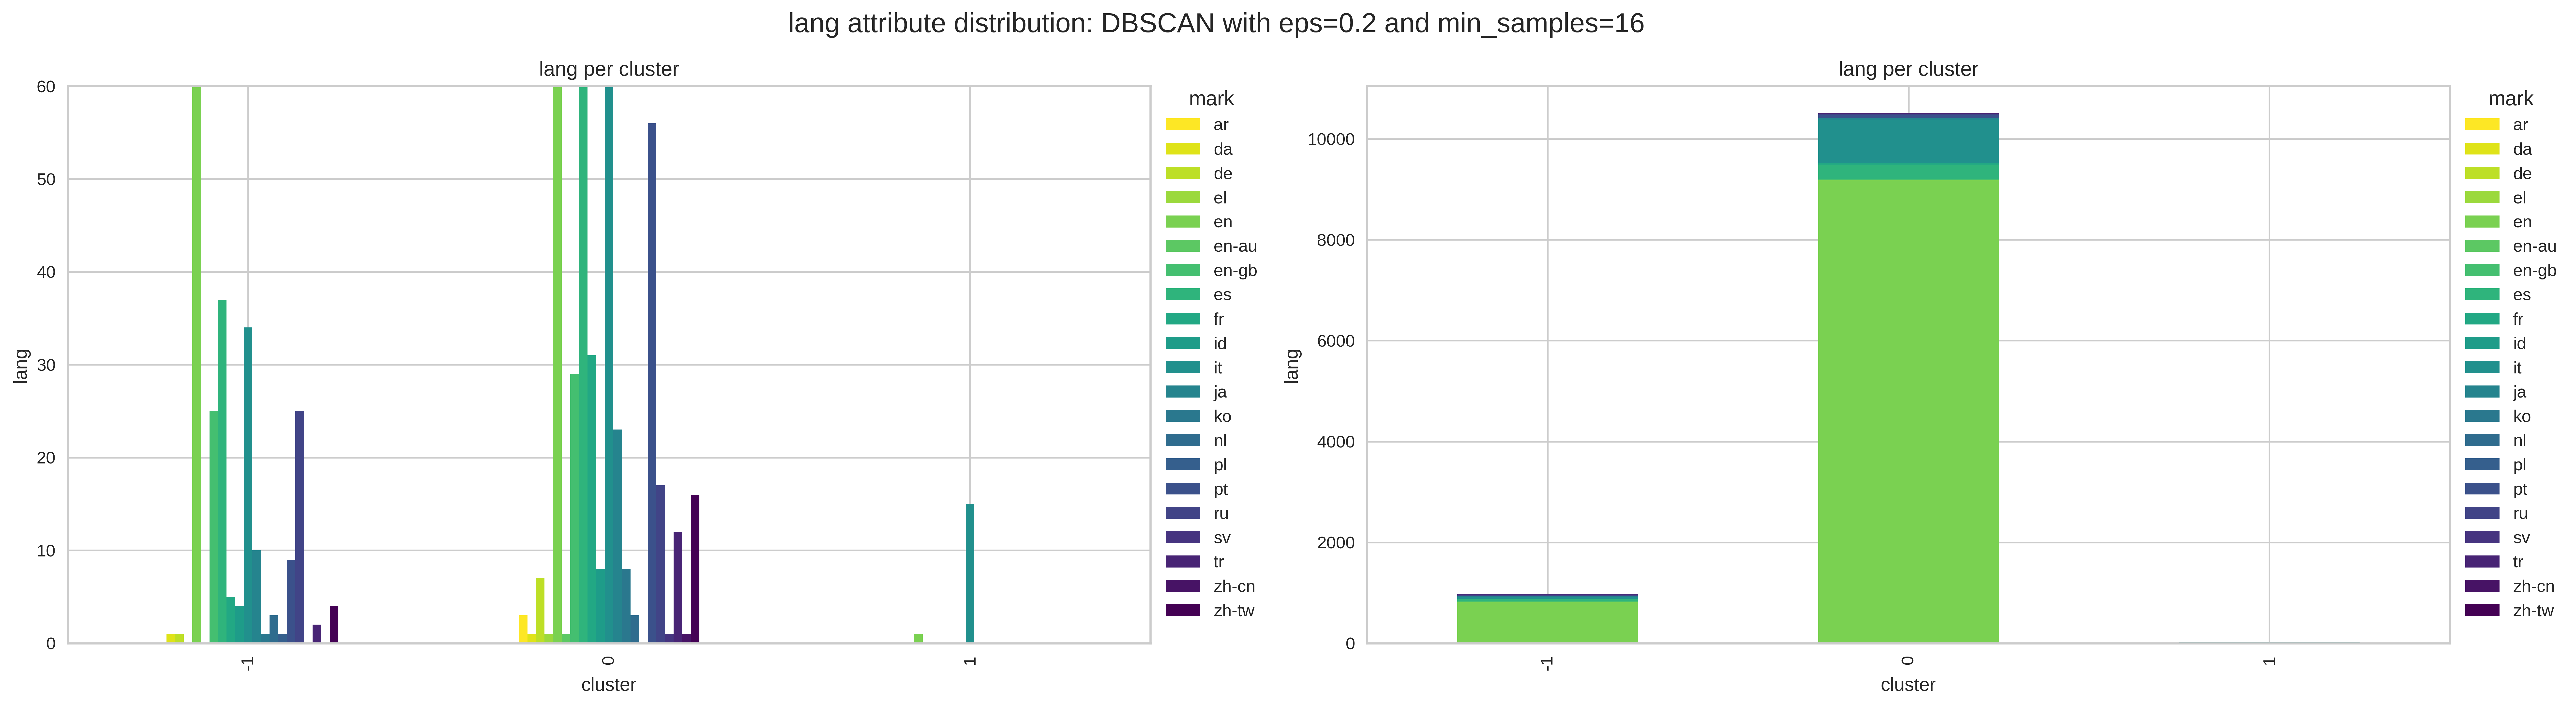

In [ ]:
lang_ct = pd.crosstab(dbscan1.labels_,users_profile_all['lang'])

f, axs = plt.subplots(ncols=2, figsize=(25,6),  dpi=500)

ax1 = lang_ct.plot(kind='bar', stacked=False, title='lang per cluster', ax=axs[0], colormap="viridis_r")
ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
axs[0].set_xlabel('cluster')
axs[0].set_ylabel('lang')
axs[0].set_ylim(0, 60) 

ax2 = lang_ct.plot(kind='bar', stacked=True, title='lang per cluster', ax=axs[1], colormap="viridis_r")
ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
axs[1].set_xlabel('cluster')
axs[1].set_ylabel('lang')

f.suptitle('lang attribute distribution: DBSCAN with eps=0.2 and min_samples=16 ', fontsize=16)

plt.show()

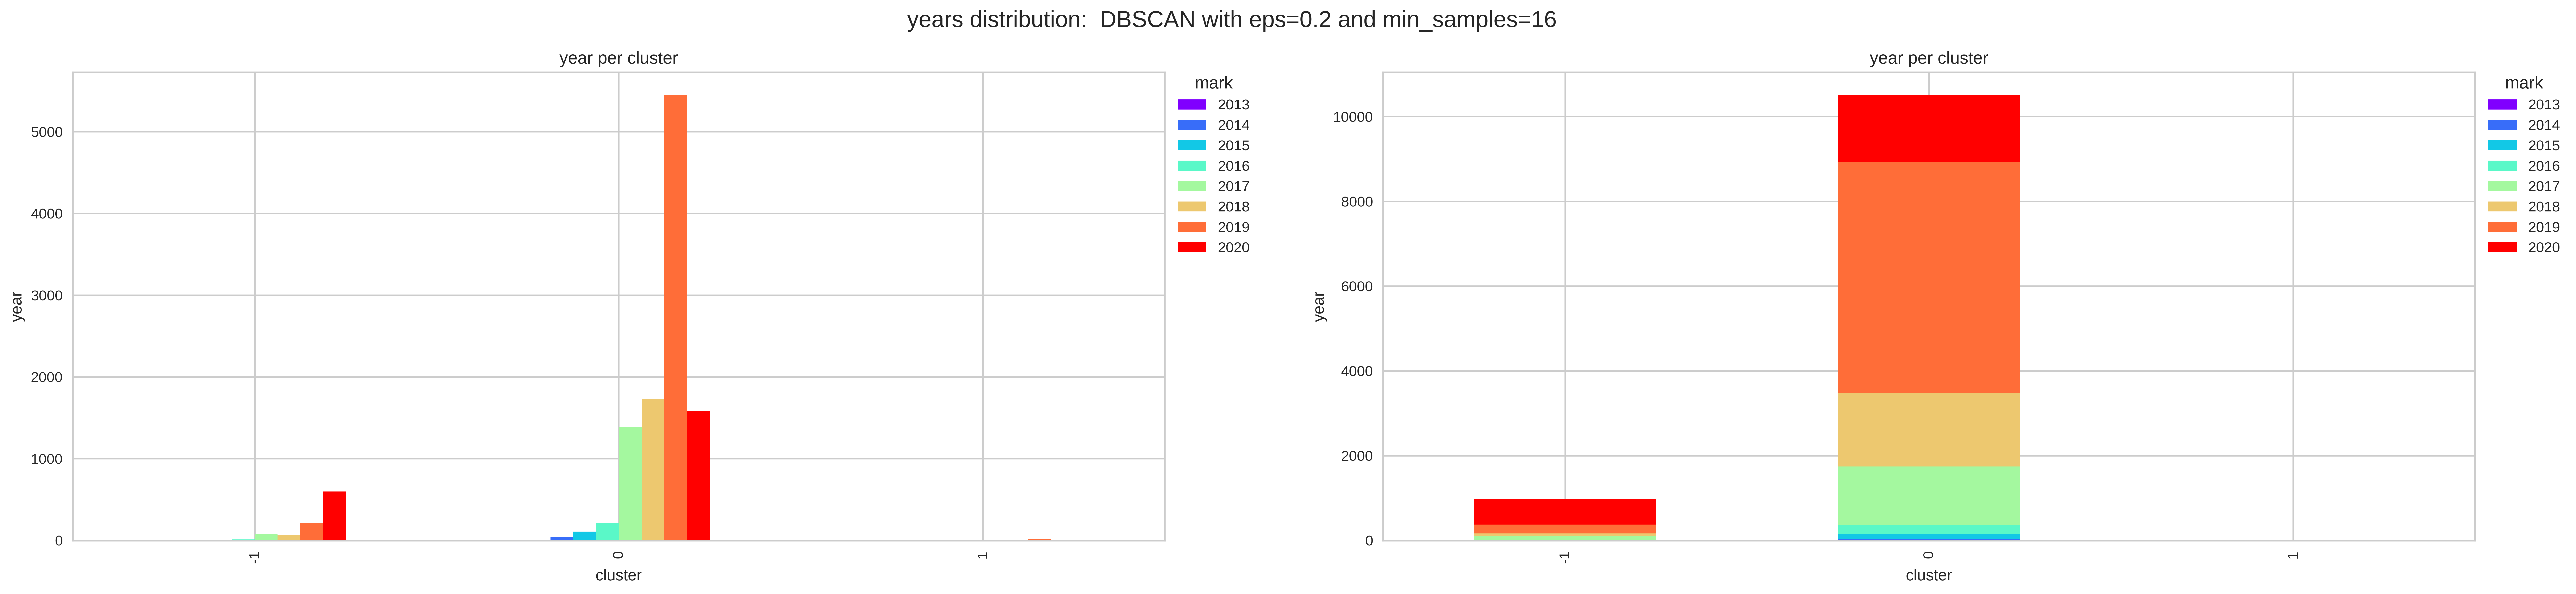

In [ ]:
year_ct = pd.crosstab(dbscan1.labels_,users_profile_all['most_freq_year'])

f, axs = plt.subplots(ncols=2, figsize=(30,6),  dpi=500)

ax1 = year_ct.plot(kind='bar', stacked=False, title='year per cluster', ax=axs[0], colormap="rainbow")
ax1.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
axs[0].set_xlabel('cluster')
axs[0].set_ylabel('year')

ax2 = year_ct.plot(kind='bar', stacked=True, title='year per cluster', ax=axs[1], colormap="rainbow")
ax2.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')
axs[1].set_xlabel('cluster')
axs[1].set_ylabel('year')

f.suptitle('years distribution:  DBSCAN with eps=0.2 and min_samples=16 ', fontsize=16)


plt.show()

### With respect to numerical features

In [ ]:
# Dump components relations with features:
print(pd.DataFrame(pca.components_,columns=users_profile.columns,index = ['PC-1','PC-2']))

      statuses_count  retweet_count  favorite_count  num_hashtags  num_urls  \
PC-1        0.272273       0.269597        0.080194      0.271637  0.223189   
PC-2       -0.222572       0.147555        0.223027     -0.185764 -0.218393   

      num_mentions  max_retweet_count  max_favorite_count  std_retweet_count  \
PC-1      0.365528           0.333842            0.145927           0.331711   
PC-2     -0.214669           0.063325            0.314142           0.317450   

      std_favorite_count  popularity  tweet_richness  text_entropy  \
PC-1            0.136401    0.234542        0.160214      0.283693   
PC-2            0.481498    0.445866       -0.068980     -0.217515   

      avg_textlen  days_on_tw  activity_richness  
PC-1     0.118936    0.190908           0.341187  
PC-2     0.059689   -0.105372          -0.223202  


In [ ]:
Xdf = pd.DataFrame(X, columns=users_profile.columns)

<AxesSubplot: >

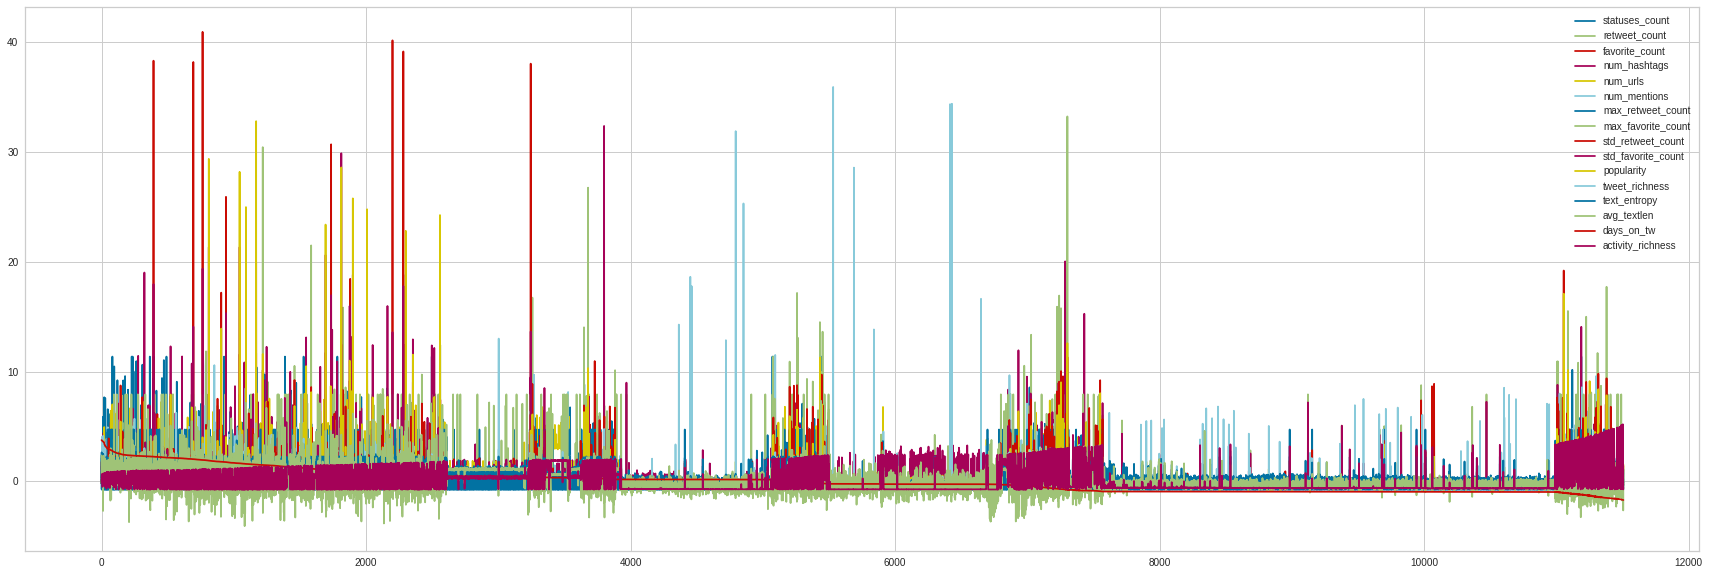

In [ ]:
Xdf.plot(figsize=(30,10))

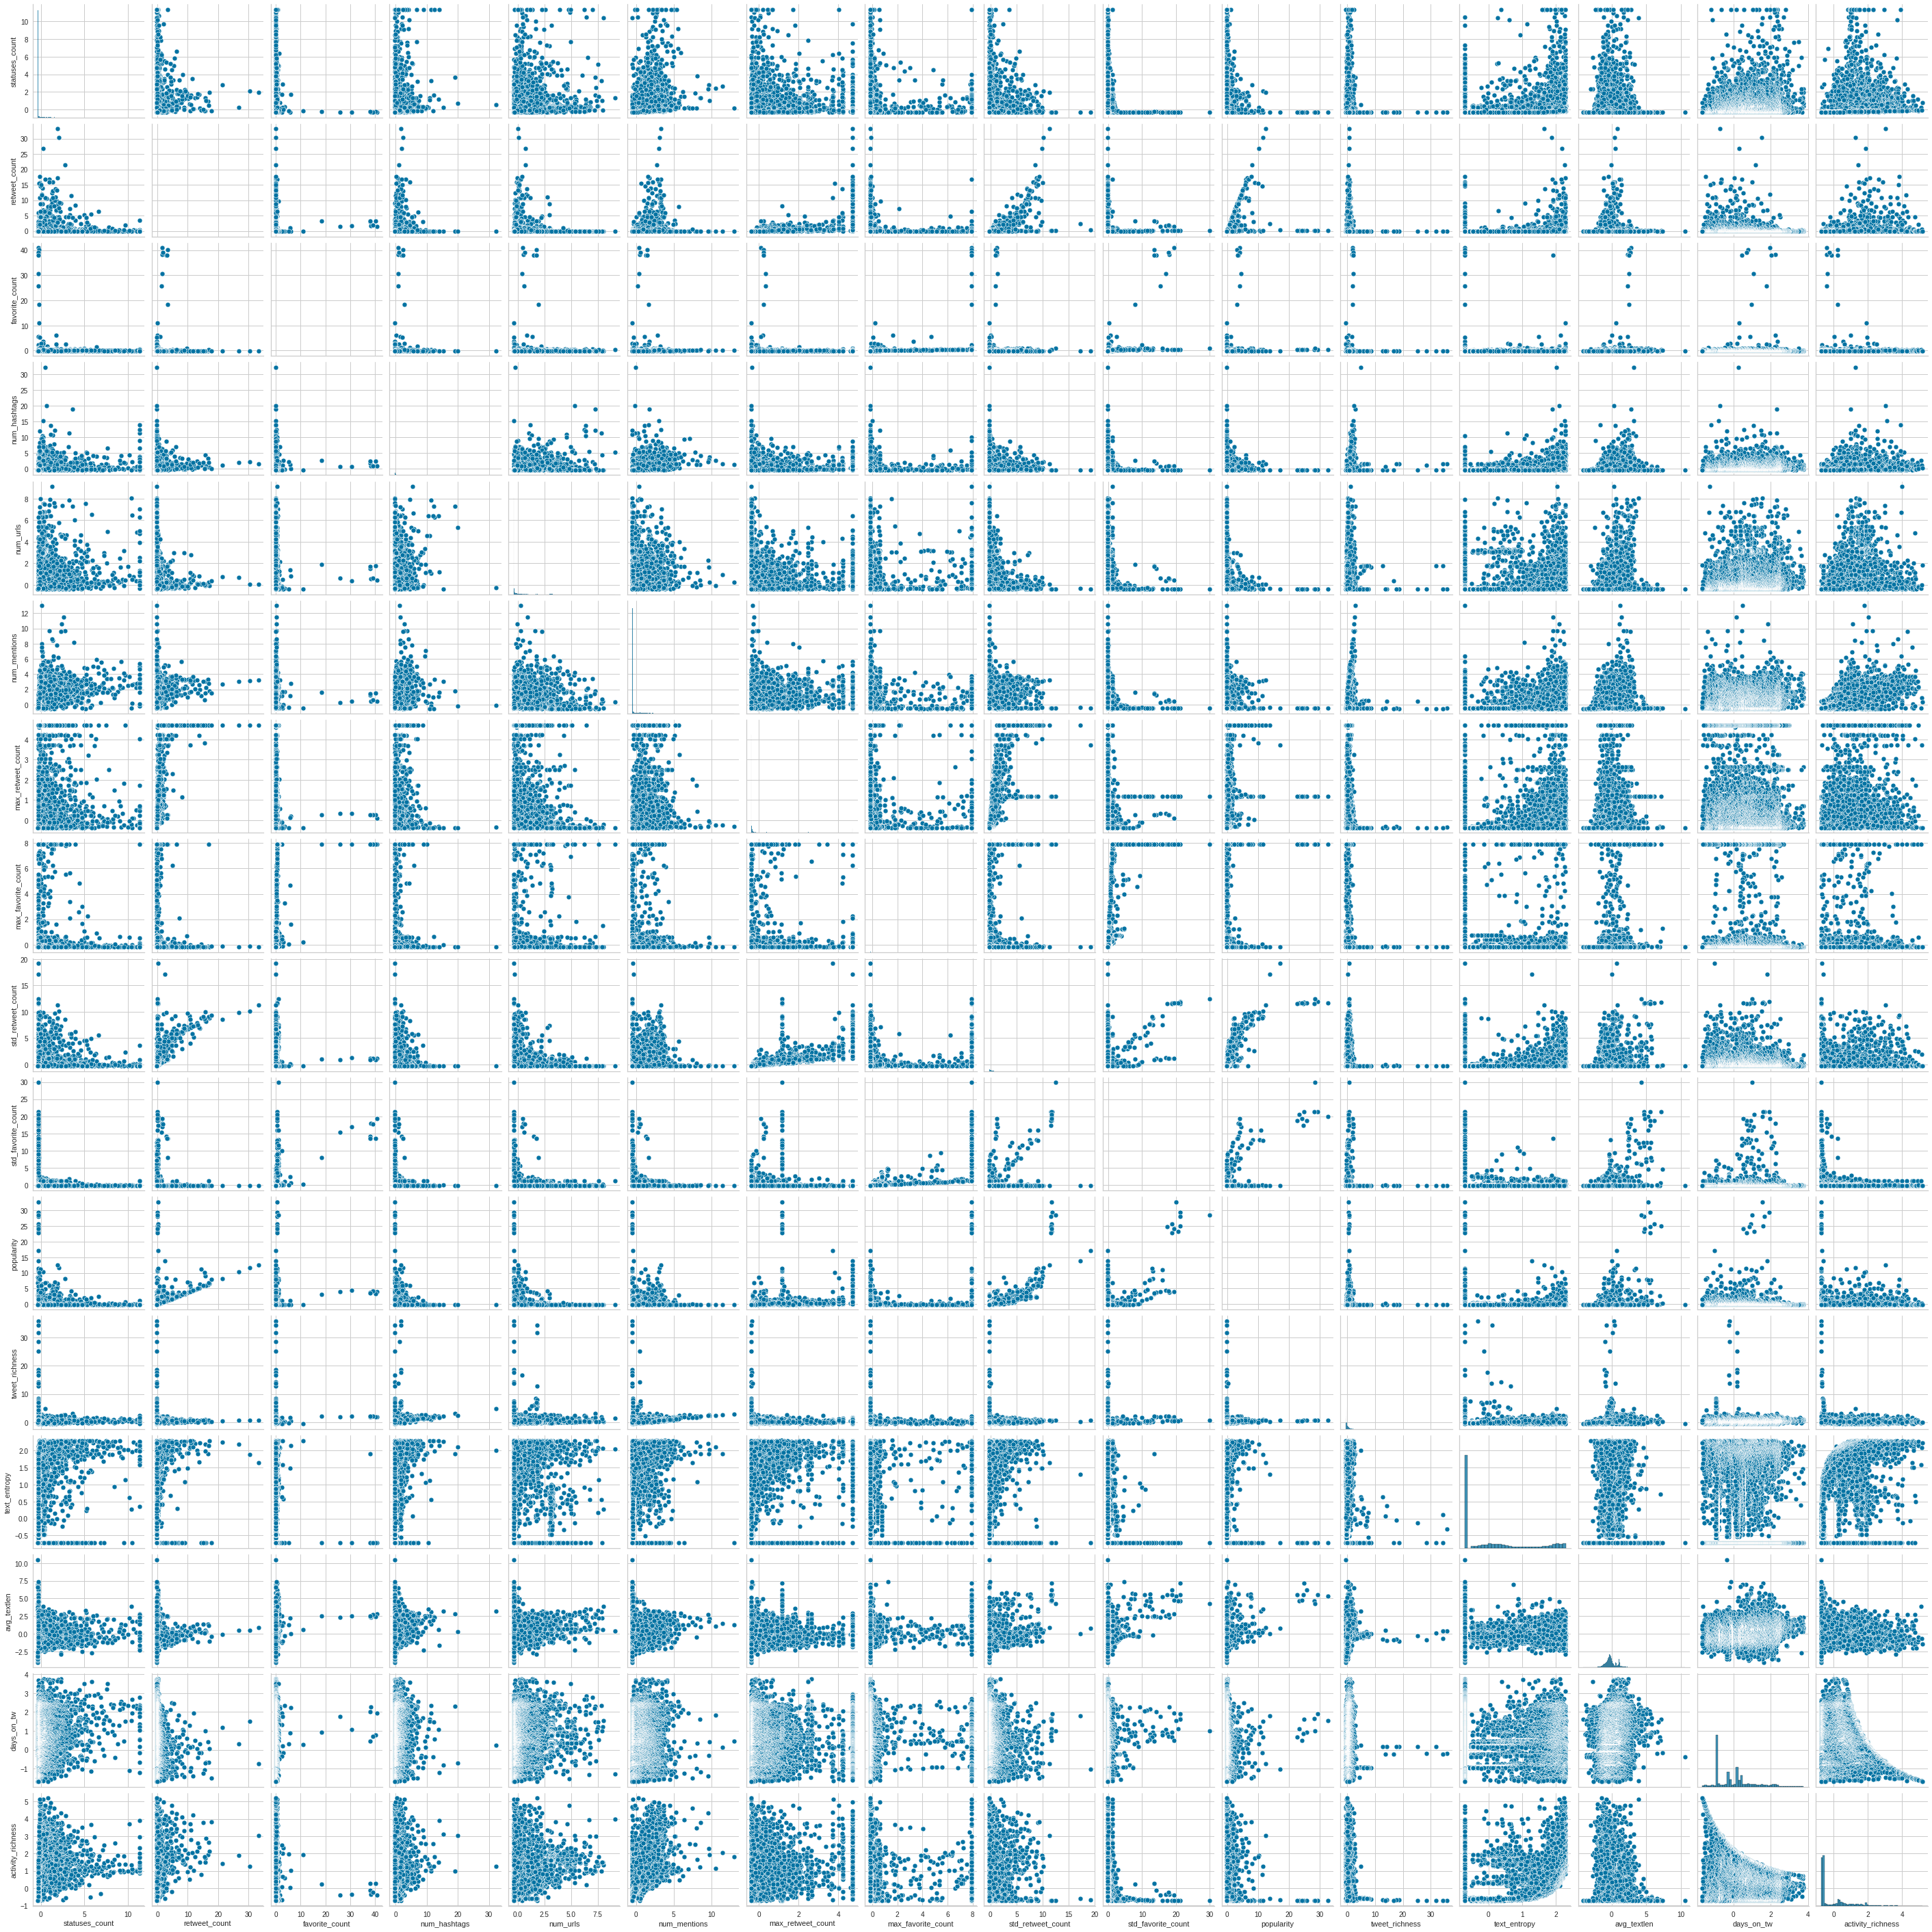

In [ ]:
sns.pairplot(Xdf, palette = "Accent")

#Scatter plot based on dbscan on pairwise attributes 
plt.show()

In [ ]:
users_prof = users_profile.copy()

In [ ]:
users_prof.columns

Index(['statuses_count', 'retweet_count', 'favorite_count', 'num_hashtags',
       'num_urls', 'num_mentions', 'max_retweet_count', 'max_favorite_count',
       'std_retweet_count', 'std_favorite_count', 'popularity',
       'tweet_richness', 'text_entropy', 'avg_textlen', 'days_on_tw',
       'activity_richness'],
      dtype='object')

In [ ]:
alldbscan = []
alldbscan = alldbscan + [dbscan1, dbscan2, dbscan3, dbscan4]
alldbscan

[DBSCAN(eps=2, min_samples=16),
 DBSCAN(eps=3, min_samples=8),
 DBSCAN(eps=4, min_samples=6),
 DBSCAN(eps=5, min_samples=8)]

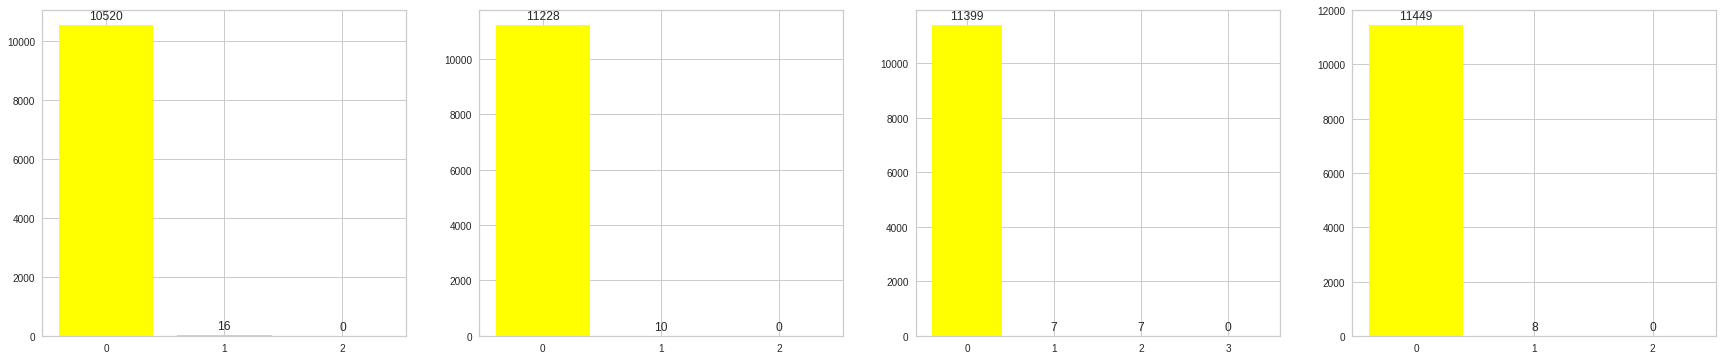

In [ ]:
fig, ax = plt.subplots(ncols=len(alldbscan), figsize=(30,6))
for i in range(len(alldbscan)):
  hist, bins = np.histogram(alldbscan[i].labels_, bins=range(0, len(set(alldbscan[i].labels_)) + 1))
  #plt.stairs(hist, bins)
  clusters = ax[i].bar(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).values()), align='center', color=['#ffff00', '#bfff00', '#00ff40', '#00ff80', '#00ffbf', '#00ffff', '#00bfff', '#0080ff', '#0040ff', '#0000ff', '#4000ff', '#8000ff', '#bf00ff', '#ff00ff', '#ff00bf', '#ff0080', '#ff0040', '#ff0000', '#756bb1'])
  ax[i].set_xticks(range(len(dict(zip(bins, hist)))), list(dict(zip(bins, hist)).keys()))
  ax[i].bar_label(clusters, padding=3)
plt.show()

In [ ]:
cols = []
for i in range(len(alldbscan)):
  s = 'dbscan_'+str(i+1)
  cols.append(s)

In [ ]:
for i in range(len(alldbscan)):
  users_profile[cols[i]]=alldbscan[i].labels_

In [ ]:
users_profile

statuses_count  retweet_count  favorite_count  num_hashtags  num_urls  \
0               45825       187157.0          1201.0         868.0     793.0   
1               11770      1158520.0           969.0         766.0     345.0   
2               39158        92396.0           391.0          77.0     318.0   
3               18035       317861.0           209.0         488.0     848.0   
4               22496       138486.0          1714.0         185.0     234.0   
...               ...            ...             ...           ...       ...   
11503           19061            7.0            85.0         372.0    1006.0   
11504              96         8860.0           161.0          21.0       1.0   
11505             107         2458.0             9.0          22.0      47.0   
11506               6            0.0             1.0           0.0       1.0   
11507             133       525866.0             2.0          50.0      47.0   

       num_mentions  max_retweet_count  max_favorite_count  std_retweet_count  \
0            2643.0            21325.0                34.0         723.522858   
1            1357.0           296689.0                19.0       11508.209770   
2            2113.0            13121.0                 8.0         546.629170   
3            1475.0           105138.0                 7.0        3359.356296   
4            2662.0            16181.0                32.0         462.741573   
...             ...                ...                 ...                ...   
11503         821.0                1.0                 3.0           0.043355   
11504          77.0             6181.0                18.0         611.718156   
11505          34.0              976.0                 1.0         103.166369   
11506           2.0                0.0                 1.0           0.000000   
11507         132.0            59592.0                 1.0        9474.647903   

       std_favorite_count   popularity  tweet_richness  text_entropy  \
0                1.419478    79.342039        1.812974     11.120054   
1                1.078419   573.720435        1.221178      0.000000   
2                0.490437    43.277519        1.169776      6.843951   
3                0.392886   157.694596        1.393654      0.000000   
4                1.166943    40.803260        0.896682     10.333883   
...                   ...          ...             ...           ...   
11503            0.154787     0.024751        0.591606     11.548946   
11504            2.666807    82.761468        0.908257      0.000000   
11505            0.256601    19.425197        0.811024      3.958058   
11506            0.372678     0.166667        0.500000      0.000000   
11507            0.116237  3601.835616        1.568493      7.034096   

       avg_textlen  days_on_tw  activity_richness  dbscan_1  dbscan_2  \
0       109.637321        3900           0.608718        -1         0   
1        85.026719        3893           0.519137        -1         0   
2        80.780317        3885           0.551866         0         0   
3        84.281111        3884           0.519310         0         0   
4        95.166473        3870           0.887855         0         0   
...            ...         ...                ...       ...       ...   
11503    46.490945         896           4.148438        -1         0   
11504    84.586538         894           0.121924         0         0   
11505    82.080645         894           0.142058         0         0   
11506    26.666667         893           0.006719         0         0   
11507    89.316901         890           0.164045         0         0   

       dbscan_3  dbscan_4  
0             0         0  
1             0         0  
2             0         0  
3             0         0  
4             0         0  
...         ...       ...  
11503         0         0  
11504         0         0  
11505         0         0  
11506         0         0  
11507         0        

In [ ]:
for i in range(len(cols)):
  x = users_profile.groupby(cols[i])[users_prof.columns].agg(['min', 'max'])
  display(x)

statuses_count         retweet_count             favorite_count  \
                    min     max           min         max            min   
dbscan_1                                                                   
-1                    1  200000           0.0  99360670.0            0.0   
 0                    0   94383           0.0   8584060.0            0.0   
 1                   12     534           6.0      6895.0         8996.0   

                   num_hashtags          num_urls          ... tweet_richness  \
               max          min      max      min     max  ...            min   
dbscan_1                                                   ...                  
-1        822127.0          0.0  16228.0      0.0  4335.0  ...       0.000000   
 0         25789.0          0.0   2701.0      0.0  3613.0  ...       0.000000   
 1         14106.0         61.0    164.0     28.0    55.0  ...       0.060421   

                    text_entropy            avg_textlen              \
                max          min        max         min         max   
dbscan_1                                                              
-1        41.833333          0.0  11.794194   21.107632  245.000000   
 0         7.621429          0.0  11.821278    3.000000  181.428571   
 1         0.579574          0.0   7.304319   87.404011   89.734992   

         days_on_tw       activity_richness            
                min   max               min       max  
dbscan_1                                               
-1              896  3900          0.000455  4.148438  
 0              890  3885          0.000319  3.971922  
 1             1357  2115          0.688162  1.478739  

[3 rows x 32 columns]

statuses_count         retweet_count             favorite_count  \
                    min     max           min         max            min   
dbscan_2                                                                   
-1                    1  200000           0.0  99360670.0            0.0   
 0                    0  200000           0.0  34349828.0            0.0   
 1                   68     382      552852.0    960873.0        10082.0   

                   num_hashtags          num_urls          ... tweet_richness  \
               max          min      max      min     max  ...            min   
dbscan_2                                                   ...                  
-1        822127.0          0.0  16228.0      0.0  4335.0  ...       0.000000   
 0         59848.0          0.0   4483.0      0.0  3813.0  ...       0.000000   
 1         20138.0          8.0    166.0      3.0   187.0  ...       0.952607   

                    text_entropy            avg_textlen              \
                max          min        max         min         max   
dbscan_2                                                              
-1        41.833333          0.0  11.741517   21.107632  245.000000   
 0        10.440860          0.0  11.821278    3.000000  186.094595   
 1         1.858586          0.0   0.000000   92.275862  165.230769   

         days_on_tw       activity_richness            
                min   max               min       max  
dbscan_2                                               
-1              919  3756          0.000500  4.101197  
 0              890  3900          0.000319  4.148438  
 1             2101  3064          0.044454  0.131466  

[3 rows x 32 columns]

statuses_count         retweet_count             favorite_count  \
                    min     max           min         max            min   
dbscan_3                                                                   
-1                    2  200000           0.0  99360670.0            0.0   
 0                    0  200000           0.0  47604806.0            0.0   
 1                   51      87      681032.0    960097.0        10103.0   
 2                   29      41      674398.0   1034580.0        10103.0   

                   num_hashtags          num_urls          ... tweet_richness  \
               max          min      max      min     max  ...            min   
dbscan_3                                                   ...                  
-1        822127.0          0.0  16228.0      0.0  4335.0  ...       0.000000   
 0        105015.0          0.0   5613.0      0.0  3813.0  ...       0.000000   
 1         20759.0          1.0     40.0      3.0    44.0  ...       0.731707   
 2         10142.0          8.0     12.0      2.0     5.0  ...       1.117647   

                    text_entropy            avg_textlen              \
                max          min        max         min         max   
dbscan_3                                                              
-1        41.833333          0.0  11.741517   31.231112  245.000000   
 0        10.440860          0.0  11.821278    3.000000  186.094595   
 1         1.837838          0.0   0.000000   67.371429  163.794872   
 2         1.384615          0.0   0.000000  147.071429  189.000000   

         days_on_tw       activity_richness            
                min   max               min       max  
dbscan_3                                               
-1              919  3308          0.001241  4.101197  
 0              890  3900          0.000319  4.148438  
 1             2117  3015          0.013599  0.023942  
 2             2100  2734          0.004755  0.008707  

[4 rows x 32 columns]

statuses_count         retweet_count             favorite_count  \
                    min     max           min         max            min   
dbscan_4                                                                   
-1                   16  200000           0.0  99360670.0            0.0   
 0                    0  200000           0.0  53221130.0            0.0   
 1                   28      41      674398.0   1034580.0        10103.0   

                   num_hashtags          num_urls          ... tweet_richness  \
               max          min      max      min     max  ...            min   
dbscan_4                                                   ...                  
-1        822127.0          2.0  16228.0      0.0  4335.0  ...       0.011410   
 0        124427.0          0.0   7028.0      0.0  3813.0  ...       0.000000   
 1         10142.0          8.0     12.0      2.0     5.0  ...       1.117647   

                    text_entropy            avg_textlen              \
                max          min        max         min         max   
dbscan_4                                                              
-1        41.833333          0.0  11.727582   31.231112  158.266667   
 0        15.409091          0.0  11.821278    3.000000  245.000000   
 1         1.384615          0.0   0.000000  147.071429  189.000000   

         days_on_tw       activity_richness            
                min   max               min       max  
dbscan_4                                               
-1             1031  3092          0.005042  3.503330  
 0              890  3900          0.000319  4.148438  
 1             2100  2868          0.004533  0.008707  

[3 rows x 32 columns]

In [ ]:
for i in range(len(cols)):
  x = users_profile.groupby(cols[i])[users_prof.columns].mean()
  display(x)

statuses_count  retweet_count  favorite_count  num_hashtags  \
dbscan_1                                                                
-1          31305.904321   3.908678e+06    10427.906379    908.573045   
 0           3196.567681   1.889182e+05      416.684886    111.325760   
 1            178.875000   2.536625e+03    10801.625000    115.187500   

            num_urls  num_mentions  max_retweet_count  max_favorite_count  \
dbscan_1                                                                    
-1        660.855967   2157.020576      194967.591564         1896.963992   
 0        138.688973    354.084981       22341.131939           48.300856   
 1         36.875000     72.000000         892.625000         9704.437500   

          std_retweet_count  std_favorite_count   popularity  tweet_richness  \
dbscan_1                                                                       
-1             10464.805301          120.357675  2474.815190        1.871528   
 0               904.119558            6.177765   135.697930        0.548510   
 1                26.346835          241.400795     8.150265        0.130518   

          text_entropy  avg_textlen   days_on_tw  activity_richness  
dbscan_1                                                             
-1            6.340550    81.430110  2144.359053           1.397345  
 0            2.495030    69.243452  1790.455038           0.427196  
 1            2.844072    88.621896  1982.187500           0.848134

statuses_count  retweet_count  favorite_count  num_hashtags  \
dbscan_2                                                                
-1          36558.929630   7.879614e+06    29685.922222   1347.811111   
 0           4826.071518   3.252214e+05      581.761667    150.629409   
 1            205.100000   7.613755e+05    14505.700000     94.700000   

            num_urls  num_mentions  max_retweet_count  max_favorite_count  \
dbscan_2                                                                    
-1        758.359259   2324.511111      202352.300000         3186.674074   
 0        168.899982    462.630566       32810.943178          137.766566   
 1         78.400000     71.600000      151509.800000        10000.000000   

          std_retweet_count  std_favorite_count   popularity  tweet_richness  \
dbscan_2                                                                       
-1             17189.444343          325.585198  6200.633450        2.813187   
 0              1319.397021            8.003233   188.206961        0.607317   
 1             22821.032465          807.185187  4583.419951        1.302585   

          text_entropy  avg_textlen   days_on_tw  activity_richness  
dbscan_2                                                             
-1            5.991480    89.636290  2086.651852           1.380890  
 0            2.746575    69.769630  1813.665568           0.489158  
 1            0.000000   143.392903  2438.600000           0.078833

statuses_count  retweet_count  favorite_count  num_hashtags  \
dbscan_3                                                                
-1          36150.263158   1.075708e+07    73587.178947   1892.147368   
 0           5318.462584   4.170203e+05      661.135889    164.590052   
 1             60.714286   7.825207e+05    13477.714286     19.714286   
 2             34.000000   8.114494e+05    10123.142857      9.857143   

            num_urls  num_mentions  max_retweet_count  max_favorite_count  \
dbscan_3                                                                    
-1        819.357895   1720.778947      195540.221053         3219.947368   
 0        177.557768    496.460216       35428.901833          180.836038   
 1         15.714286     10.428571      151508.428571        10000.000000   
 2          2.857143      7.571429      151508.142857        10000.000000   

          std_retweet_count  std_favorite_count    popularity  tweet_richness  \
dbscan_3                                                                        
-1             18255.504443          346.797564   7647.294883        5.129290   
 0              1506.901896           10.892626    228.867784        0.621777   
 1             45238.605156         1647.578380  18662.403855        1.079900   
 2             65061.739506         2456.613171  52457.039047        1.294719   

          text_entropy  avg_textlen   days_on_tw  activity_richness  
dbscan_3                                                             
-1            5.838726    89.041281  2032.031579           1.292016  
 0            2.798628    70.050246  1818.150101           0.503814  
 1            0.000000   131.051518  2382.857143           0.018418  
 2            0.000000   161.441385  2400.428571           0.006664

statuses_count  retweet_count  favorite_count  num_hashtags  \
dbscan_4                                                                
-1          36578.666667   1.185040e+07   131312.882353   2024.254902   
 0           5432.292340   4.520789e+05      691.268495    170.565901   
 1             33.250000   8.092438e+05    10123.250000      9.625000   

            num_urls  num_mentions  max_retweet_count  max_favorite_count  \
dbscan_4                                                                    
-1        709.392157   1371.960784      160191.490196         3949.725490   
 0        180.430518    502.464844       36262.526596          194.410778   
 1          2.750000      7.500000      151507.000000        10000.000000   

          std_retweet_count  std_favorite_count    popularity  tweet_richness  \
dbscan_4                                                                        
-1             19067.576482          492.068903   8928.424815        7.896402   
 0              1588.728502           12.305562    257.559146        0.626994   
 1             65218.878449         2482.282833  53631.082243        1.296341   

          text_entropy  avg_textlen   days_on_tw  activity_richness  
dbscan_4                                                             
-1            5.836697    85.712115  2025.215686           1.064420  
 0            2.808854    70.167300  1819.256005           0.507604  
 1            0.000000   161.549674  2458.875000           0.006398

In [ ]:
for i in range(len(cols)):
  x = users_profile.groupby(cols[i])[users_prof.columns].std()
  display(x)

statuses_count  retweet_count  favorite_count  num_hashtags  \
dbscan_1                                                                
-1          44148.057132   9.401109e+06    68345.528738   1274.767563   
 0           8593.904842   6.117125e+05     1132.330092    256.648081   
 1            178.324003   2.067761e+03     1453.786178     29.595537   

            num_urls  num_mentions  max_retweet_count  max_favorite_count  \
dbscan_1                                                                    
-1        777.432114   1826.453500      197889.038495         3607.678367   
 0        384.175725    733.975378       66110.481271          200.897499   
 1          7.154253    251.580868         756.175189          541.147665   

          std_retweet_count  std_favorite_count   popularity  tweet_richness  \
dbscan_1                                                                       
-1             14525.296086          393.014974  6760.205606        3.333359   
 0              2269.526700           37.852613   360.996792        0.516723   
 1                22.651136           16.829423     1.120147        0.121859   

          text_entropy  avg_textlen  days_on_tw  activity_richness  
dbscan_1                                                            
-1            5.007113    26.727462  700.430718           0.913666  
 0            3.628053    14.910755  527.122568           0.615128  
 1            3.239590     0.676753  244.122707           0.242075

statuses_count  retweet_count  favorite_count  num_hashtags  \
dbscan_2                                                                
-1          55092.785228   1.556481e+07   127484.933986   1952.836615   
 0          14283.985206   1.395164e+06     1949.965313    357.211100   
 1             91.820417   1.314864e+05     3770.484291     59.155257   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
dbscan_2                                                                     
-1        1023.654969   2455.012728      208868.912843         4350.234486   
 0         422.983234    908.431988       90074.555526          897.840710   
 1          80.175086     57.721939          22.399405            0.000000   

          std_retweet_count  std_favorite_count    popularity  tweet_richness  \
dbscan_2                                                                        
-1             21143.189705          679.008156  11752.630747        5.860480   
 0              3644.810784           42.675533    574.939507        0.642393   
 1              4217.446383          127.326523   2041.773797        0.308954   

          text_entropy  avg_textlen  days_on_tw  activity_richness  
dbscan_2                                                            
-1            5.048151    30.626095  668.124449           1.078789  
 0            3.849951    15.667628  547.689300           0.674410  
 1            0.000000    21.292645  275.240985           0.027683

statuses_count  retweet_count  favorite_count  num_hashtags  \
dbscan_3                                                                
-1          61502.531556   2.109462e+07   208018.743024   2742.992798   
 0          16026.005232   2.097941e+06     2468.664638    402.613552   
 1             12.188988   1.106609e+05     4874.866142     14.476582   
 2              3.915780   1.281914e+05       18.631770      1.463850   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
dbscan_3                                                                     
-1        1094.687082   1990.852764      222772.364877         4429.937403   
 0         442.366865    995.031531       95186.250275         1088.047441   
 1          15.850492      1.988060          23.157843            0.000000   
 2           1.069045      1.718249          22.886885            0.000000   

          std_retweet_count  std_favorite_count    popularity  tweet_richness  \
dbscan_3                                                                        
-1             24952.278620          772.370379  13174.234810        9.417645   
 0              4332.967250           66.241590    815.301897        0.655911   
 1              3416.419345          162.186961   3342.700752        0.362690   
 2               495.756845          182.381522   3689.582186        0.104515   

          text_entropy  avg_textlen  days_on_tw  activity_richness  
dbscan_3                                                            
-1            5.059547    33.176508  613.227414           1.059997  
 0            3.892871    16.060764  551.505213           0.692332  
 1            0.000000    33.685312  302.801051           0.003702  
 2            0.000000    15.506249  241.326098           0.001555

statuses_count  retweet_count  favorite_count  num_hashtags  \
dbscan_4                                                                
-1          67434.966188   2.374114e+07   271426.895759   3245.728053   
 0          16445.213069   2.424435e+06     2792.032744    431.848222   
 1              4.200340   1.188460e+05       17.252329      1.505941   

             num_urls  num_mentions  max_retweet_count  max_favorite_count  \
dbscan_4                                                                     
-1        1034.641002   1356.296059      212529.018972         4779.574329   
 0         449.623478   1009.646097       96854.656219         1141.819746   
 1           1.035098      1.603567          21.434285            0.000000   

          std_retweet_count  std_favorite_count    popularity  tweet_richness  \
dbscan_4                                                                        
-1             27769.106196          916.170240  14644.433762       12.061046   
 0              4710.935553           80.881452   1072.803918        0.673962   
 1               638.909489          183.800468   4763.960479        0.096871   

          text_entropy  avg_textlen  days_on_tw  activity_richness  
dbscan_4                                                            
-1            5.103614    28.349004  558.362438           1.039017  
 0            3.901828    16.320606  552.168259           0.696853  
 1            0.000000    14.359264  277.932385           0.001625